<a href="https://colab.research.google.com/github/Thipwadee/AIPrototype2023/blob/main/Association_Rules_%E0%B9%81%E0%B8%81%E0%B9%89%E0%B8%A5%E0%B9%88%E0%B8%B2%E0%B8%AA%E0%B8%B8%E0%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/My Drive/Paper/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_1', usecols=lambda x: 'Unnamed' not in x)
data

,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,Temp,Globe temp,RH,V,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,ชาย,27,49,169,17.156262,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,ชาย,36,71,175,23.183673,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,หญิง,25,89,153,38.019565,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,ชาย,29,75,165,27.548209,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,ชาย,28,118,187,33.744173,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,ชาย,37,88,180,27.160494,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,หญิง,23,47,159,18.591037,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,ชาย,27,47,169,16.456006,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,ชาย,57,68,171,23.255019,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


#Data Cleaning

จัดการกับค่าว่างด้วย KNN

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data[['Weight', 'Height']])
imputed[163:168]


array([[ 78.        , 185.        ],
       [ 65.        , 169.        ],
       [ 68.54450262, 167.33507853],
       [ 64.        , 154.        ],
       [ 65.        , 150.        ]])

In [ ]:
imputed[123:130]

array([[ 49.        , 169.        ],
       [ 46.        , 155.        ],
       [ 63.        , 173.        ],
       [ 89.        , 153.        ],
       [ 68.54450262, 167.33507853],
       [ 62.        , 163.        ],
       [ 60.        , 155.        ]])

In [ ]:
data.Weight.fillna(68, inplace=True)
data.Height.fillna(167, inplace=True)

In [ ]:
BMI1 = 68/(1.67**2)
BMI1

24.38237297859371

In [ ]:
data.BMI.fillna(BMI1, inplace=True)

##ดูค่า Outlier

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7810f0b9c430>,
 'caps': [<matplotlib.lines.Line2D at 0x7810f0b9ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810f0b9c130>],
 'medians': [<matplotlib.lines.Line2D at 0x7810f0b9d960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810f0b9d660>],
 'means': []}

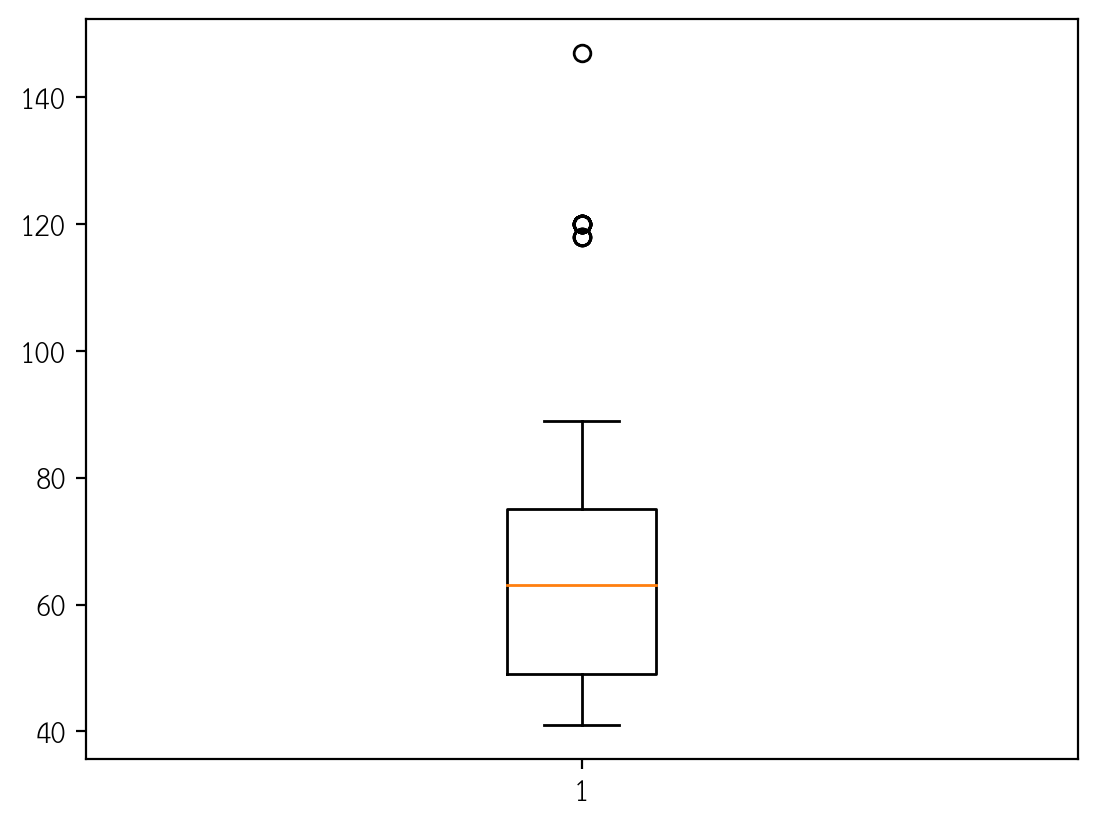

In [ ]:
plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7810eead41c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7810eead4700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810eeaa7ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7810eead4c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810eead4ee0>],
 'means': []}

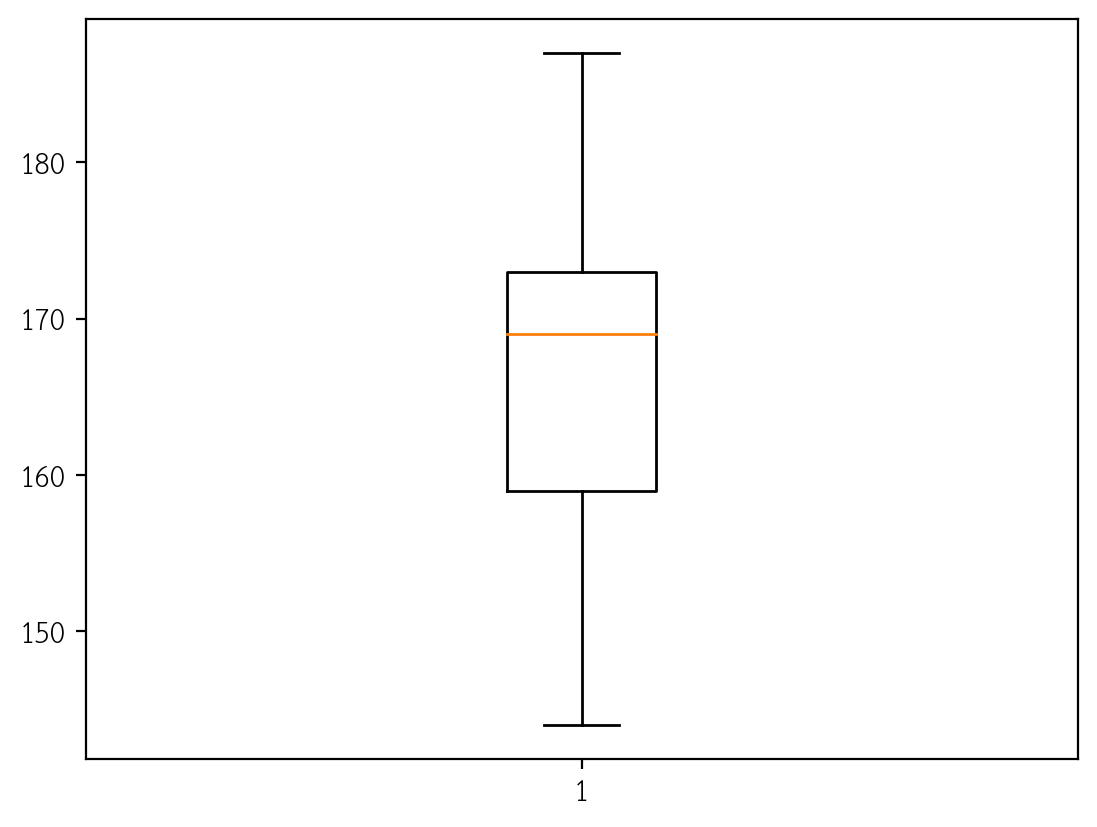

In [ ]:
plt.boxplot(data['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7810eeb2dcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7810eeb2e200>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810eeb2da20>],
 'medians': [<matplotlib.lines.Line2D at 0x7810eeb2e740>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810eeb2e9e0>],
 'means': []}

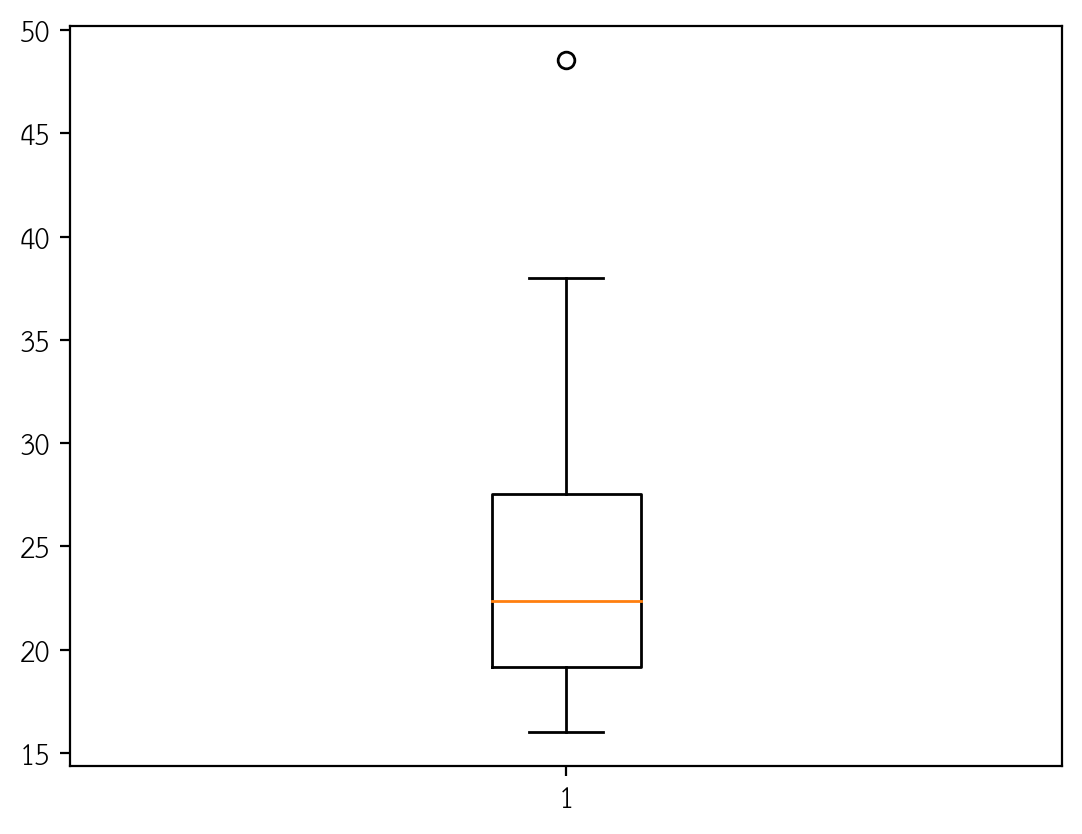

In [ ]:
plt.boxplot(data['BMI'])

#histogram
##ของตัวแปร อายุ น้ำหนัก ส่วนสูง ค่า bmi อุณหภูมิ ความชื้นสัมพัทธ์ ความเร็วลม และTMRT

In [ ]:
col = ['Age', 'BMI', 'Temp', 'RH', 'V', 'TMRT']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


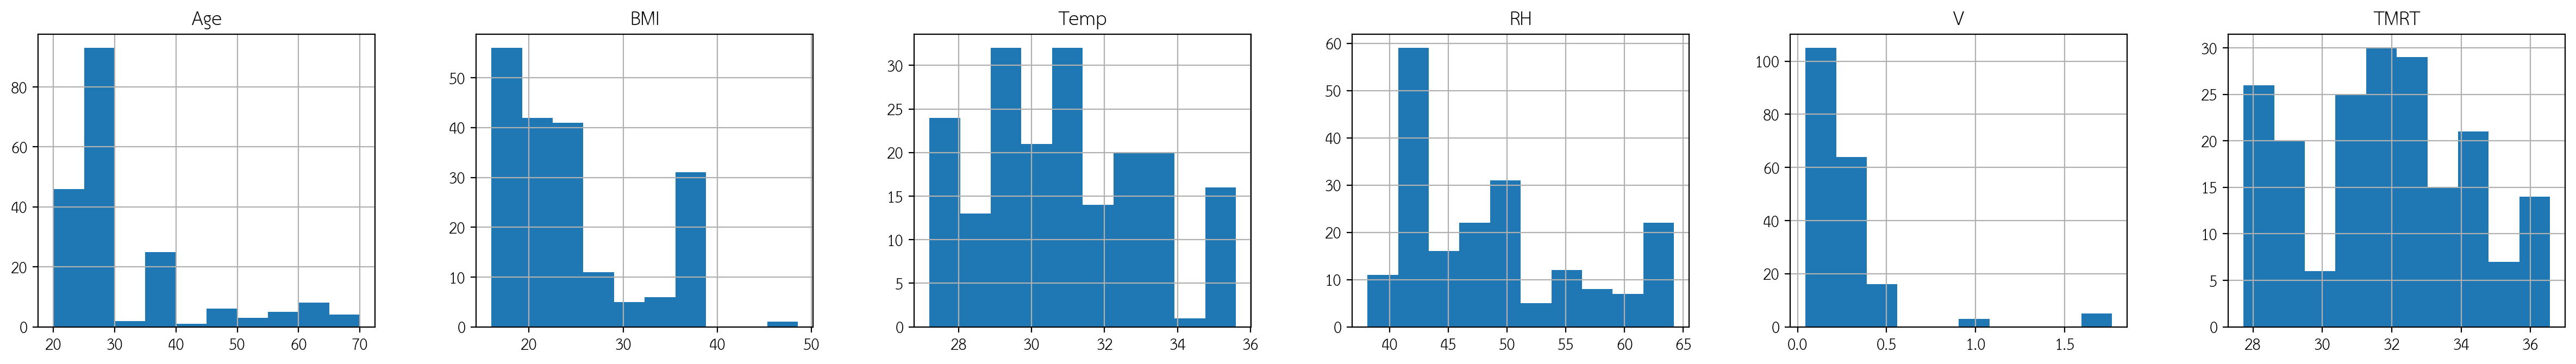

In [ ]:
data[col].hist(layout=(1, len(col)), figsize=(5 * len(col), 3.5));

#แบ่งกลุ่มข้อมูล

In [ ]:
def convert_to_buckets(Age):
    if 20 <= Age <= 39:
          return 'วัยหนุ่มสาว'
    elif 40 <= Age <= 59:
          return 'วัยกลางคน'
    else:
        return 'วัยชรา'

In [ ]:
data['age_cat']=data['Age'].map(convert_to_buckets)
data['age_cat'].value_counts()

วัยหนุ่มสาว    166
วัยกลางคน       15
วัยชรา          12
Name: age_cat, dtype: int64

<Axes: >

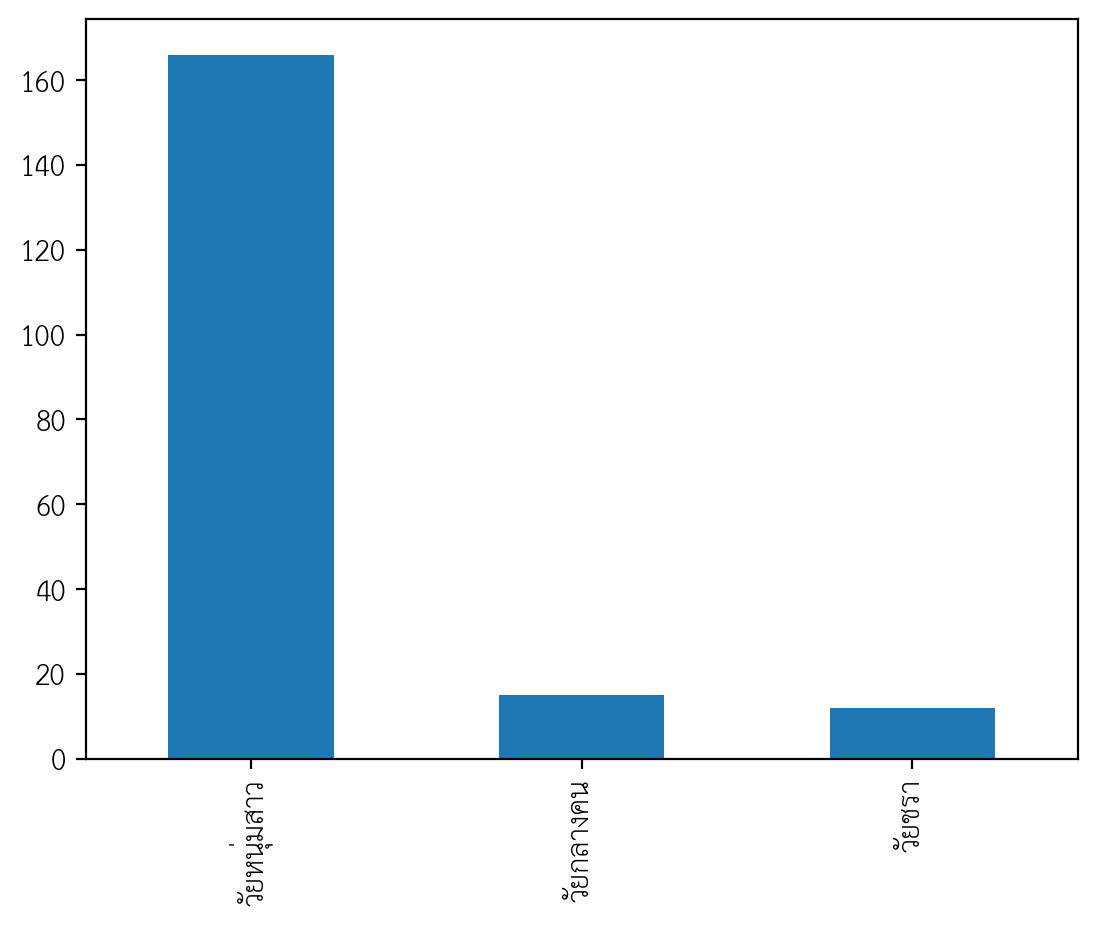

In [ ]:
data['age_cat'].value_counts().plot(kind='bar')

In [ ]:
def convert_to_buckets(V):
    if V < 0.29:
          return 'ลมสงบ'
    elif V < 1.6:
          return 'ลมเบา'
    else:
        return 'ลมอ่อน'

In [ ]:
data['v_cat']=data['V'].map(convert_to_buckets)
data['v_cat'].value_counts()

ลมสงบ     132
ลมเบา      56
ลมอ่อน      5
Name: v_cat, dtype: int64

<Axes: >

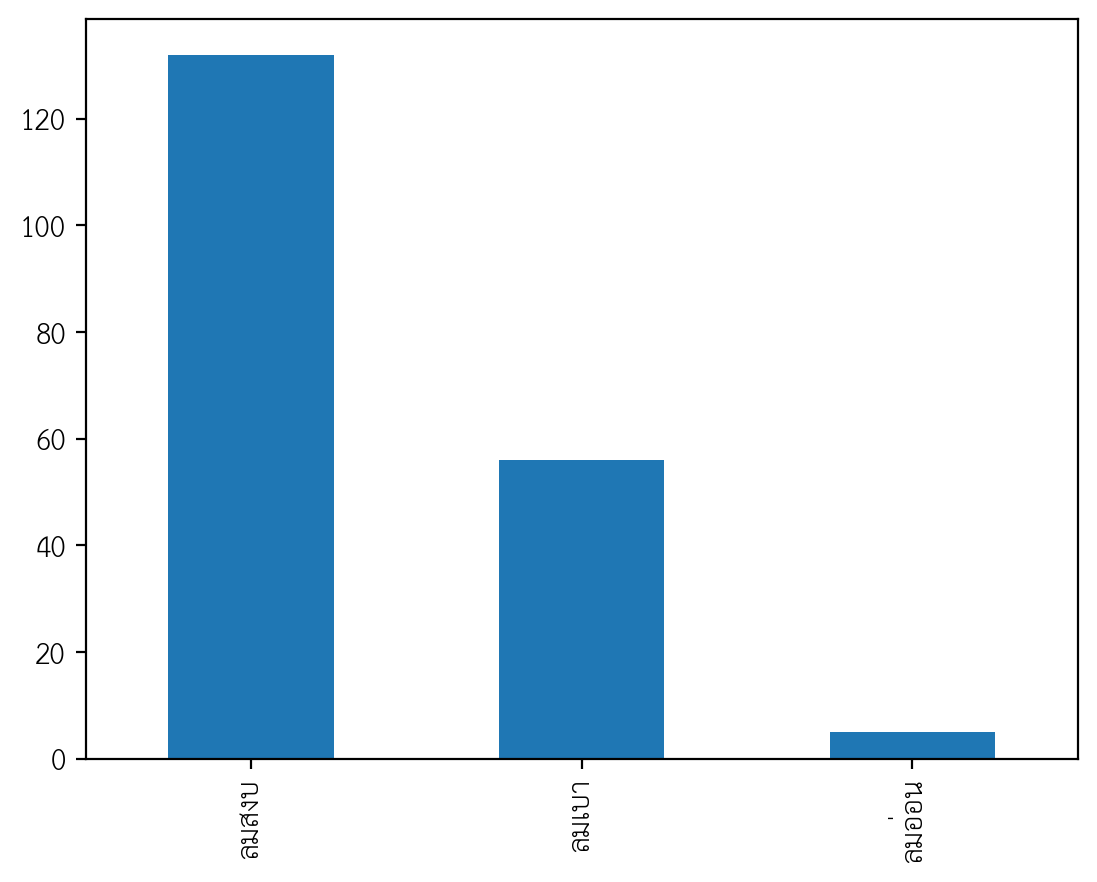

In [ ]:
data['v_cat'].value_counts().plot(kind='bar')

In [ ]:
def convert_to_buckets(RH):
    if RH < 40:
          return 'แห้งเกินไป'
    elif RH < 60:
          return 'ความชื้นเหมาะสม'
    else:
        return 'ชื้นเกินไป'

In [ ]:
data['rh_cat']=data['RH'].map(convert_to_buckets)
data['rh_cat'].value_counts()

ความชื้นเหมาะสม    163
ชื้นเกินไป          22
แห้งเกินไป           8
Name: rh_cat, dtype: int64

<Axes: >

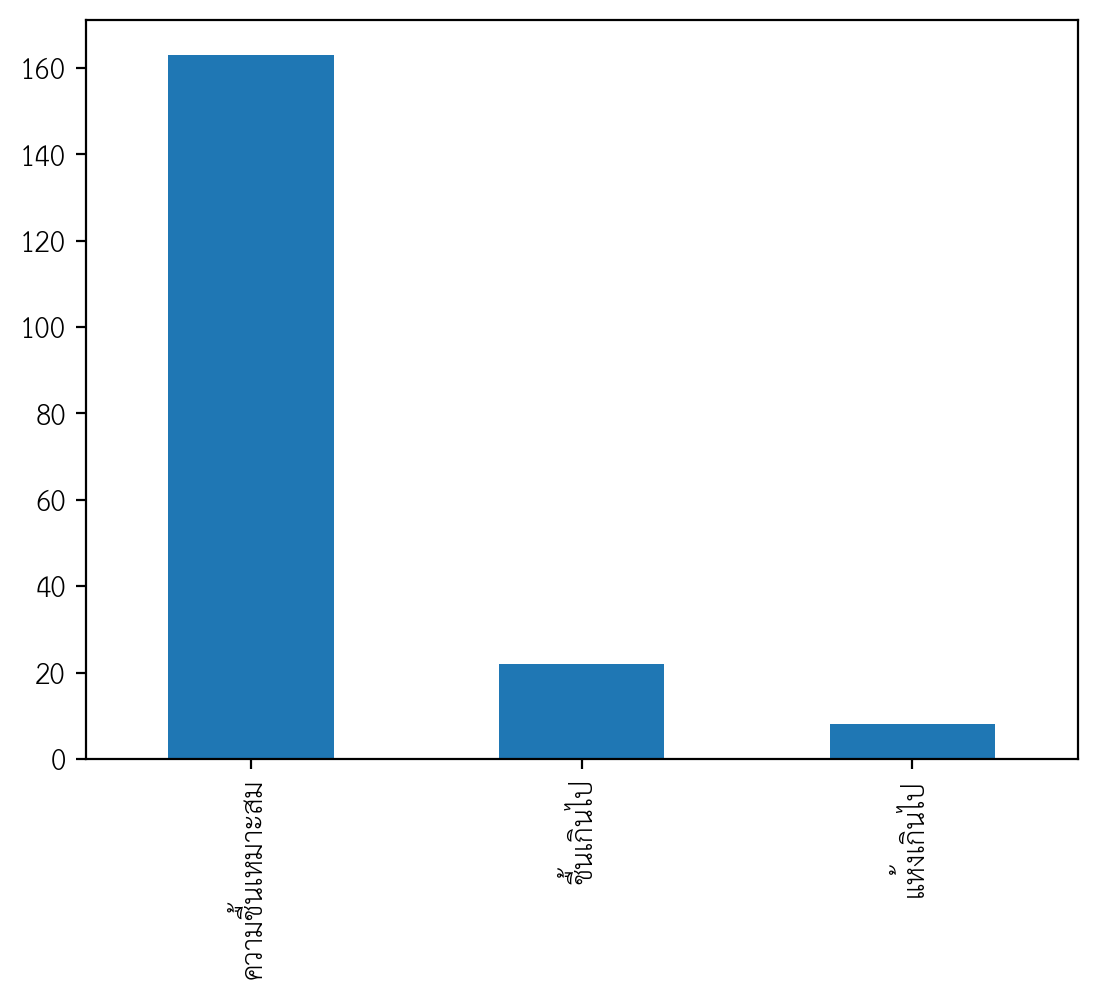

In [ ]:
data['rh_cat'].value_counts().plot(kind='bar')

In [ ]:
def convert_to_buckets(BMI):
    if BMI < 18.5:
          return 'น้ำหนักต่ำกว่าเกณฑ์'
    elif 18.5 < BMI <= 22.9:
          return 'สมส่วน'
    elif 23 <= BMI <= 24.9:
          return 'น้ำหนักเกิน'
    elif 25 <= BMI <= 29.9:
          return 'โรคอ้วนระดับที่ 1'
    else:
          return 'โรคอ้วนระดับที่ 2'

In [ ]:
data['bmi_cat']= data['BMI'].map(convert_to_buckets)
data['bmi_cat'].value_counts()

สมส่วน                 63
โรคอ้วนระดับที่ 2      41
น้ำหนักต่ำกว่าเกณฑ์    39
น้ำหนักเกิน            36
โรคอ้วนระดับที่ 1      14
Name: bmi_cat, dtype: int64

<Axes: >

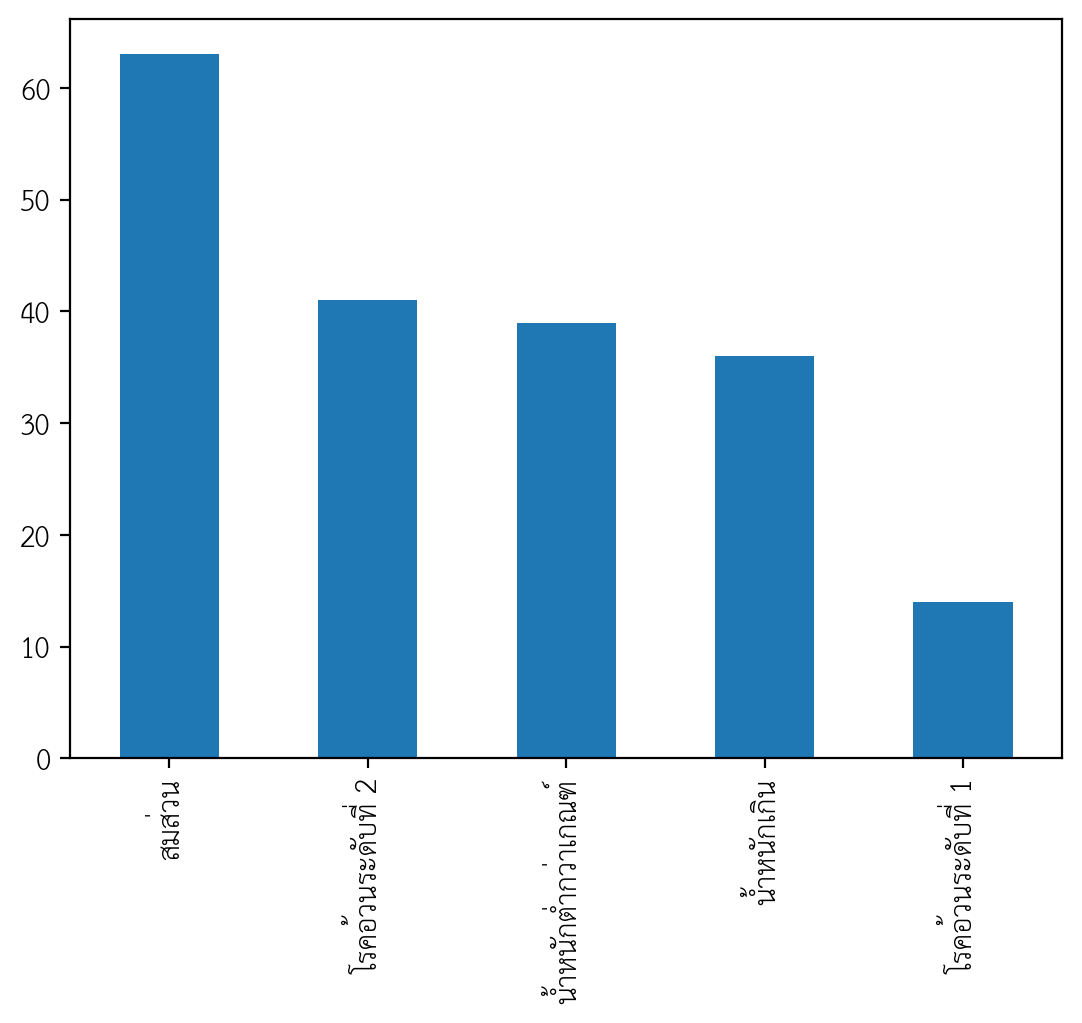

In [ ]:
data['bmi_cat'].value_counts().plot(kind='bar')

In [ ]:
def convert_to_buckets(Temp):
    if 23 <= Temp <= 28.9:
          return 'อากาศค่อนข้างเย็น'
    elif 29 <= Temp <= 34.9:
          return 'อากาศค่อนข้างร้อน'
    elif 35.0 <= Temp <= 39.9:
          return 'อากาศร้อน'

In [ ]:
data['temp_cat']=data['Temp'].map(convert_to_buckets)
data['temp_cat'].value_counts()

อากาศค่อนข้างร้อน    137
อากาศค่อนข้างเย็น     40
อากาศร้อน             16
Name: temp_cat, dtype: int64

<Axes: >

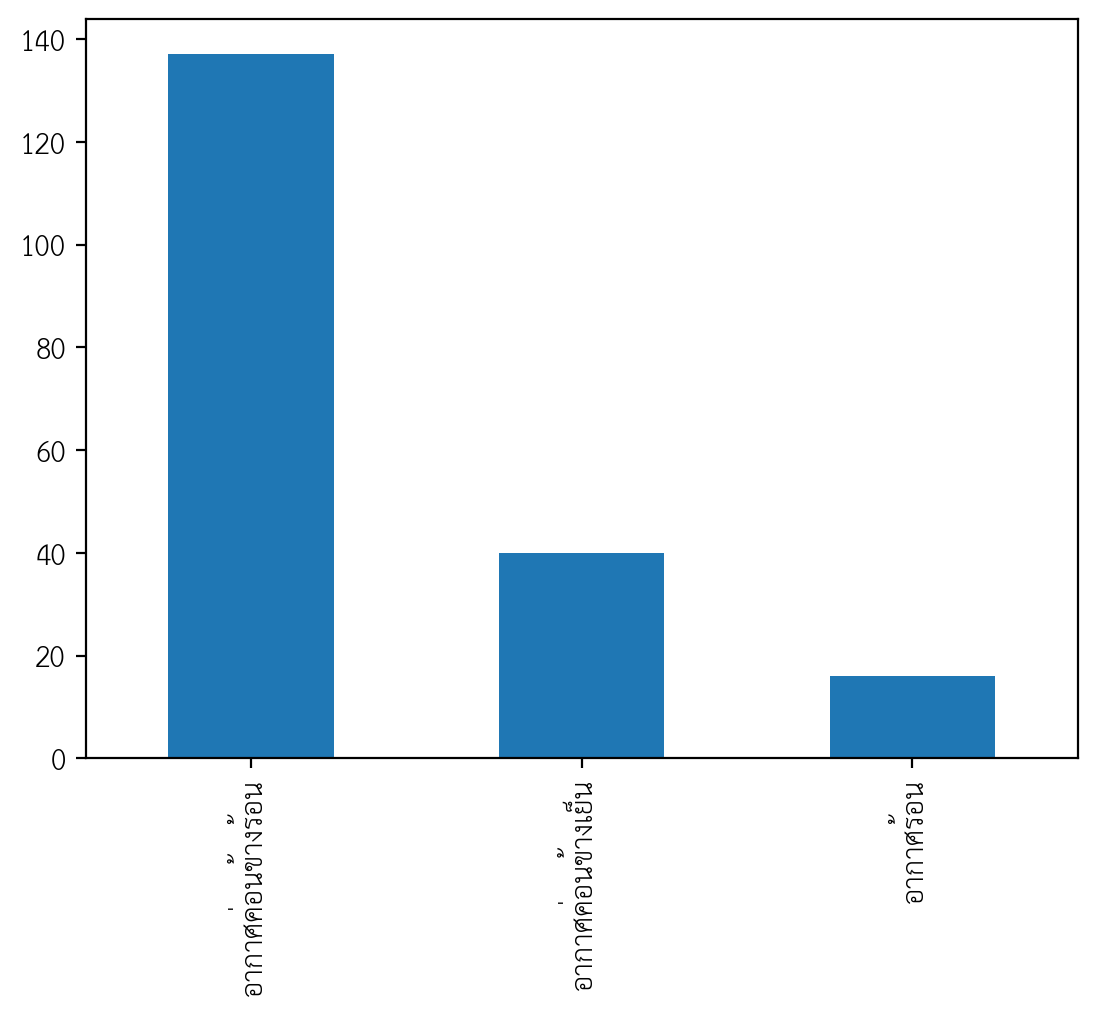

In [ ]:
data['temp_cat'].value_counts().plot(kind='bar')

<Axes: >

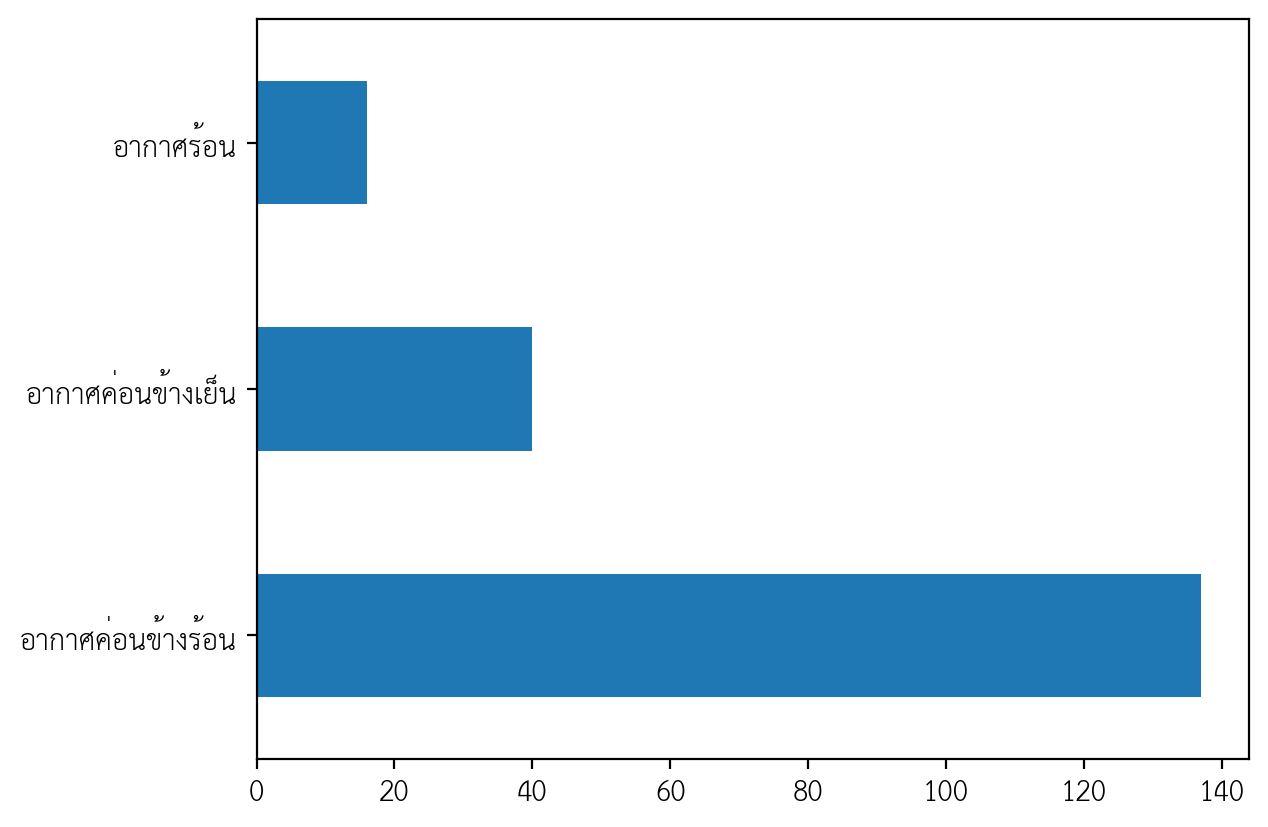

In [ ]:
data['temp_cat'].value_counts().plot(kind='barh')

<Axes: >

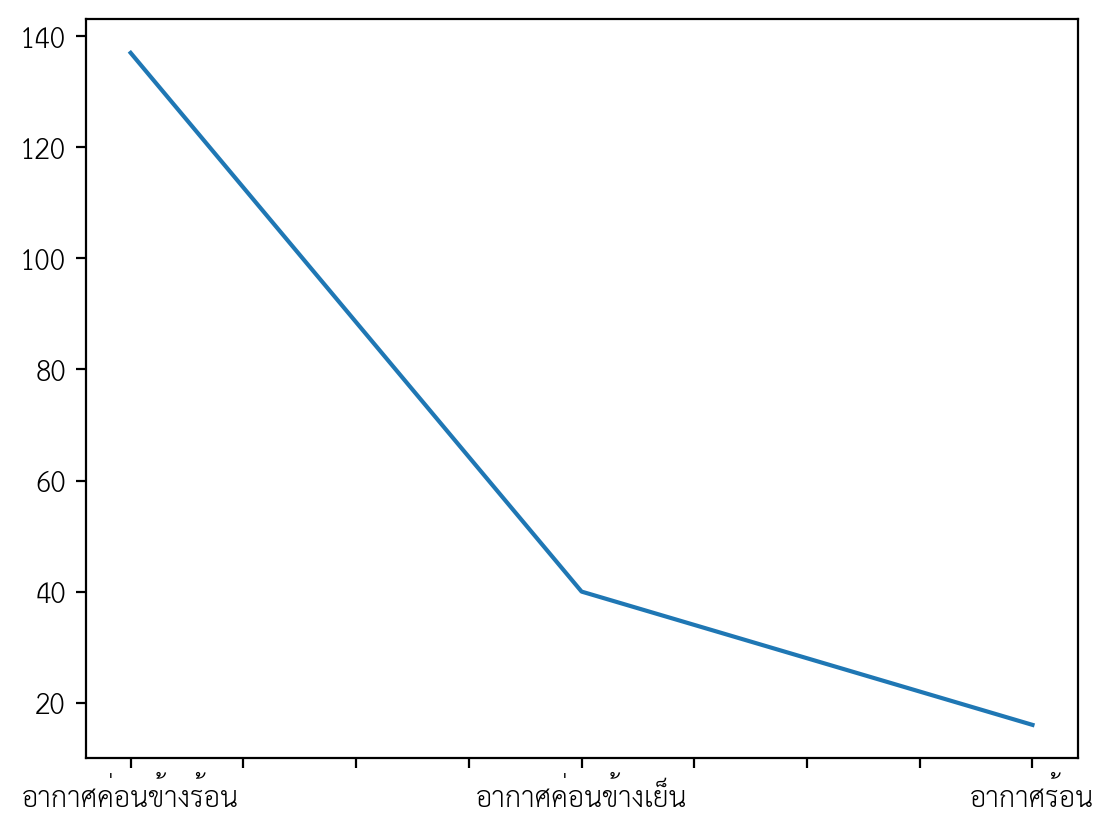

In [ ]:
data['temp_cat'].value_counts().plot()

#Association Rules

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=b90452a1d8a2db4177936550a7f9b8f5cfab045556dadb93d58e21a7452f1cc3
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import apyori

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   เพศ                     193 non-null    object 
 1   Age                     193 non-null    int64  
 2   Weight                  193 non-null    int64  
 3   Height                  193 non-null    int64  
 4   BMI                     193 non-null    float64
 5   พื้นที่ทำแบบสอบถาม      193 non-null    object 
 6   Temp                    193 non-null    float64
 7   Globe temp              193 non-null    float64
 8   RH                      193 non-null    float64
 9   V                       193 non-null    float64
 10  Thermal_acceptance      193 non-null    object 
 11  Thermal_sensation_Vote  193 non-null    int64  
 12  อุณหภูมิ                193 non-null    int64  
 13  ความชื้น                193 non-null    int64  
 14  กระแสลม                 193 non-null    in

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Apriori

## ##fo mapping

In [ ]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดอุณหภูมิ(TS)',
    1:'รู้สึกน้อยอุณหภูมิ(TS)',
    2:'รู้สึกค่อนข้างน้อยอุณหภูมิ(TS)',
    3:'รู้สึกปานกลางอุณหภูมิ(TS)',
    4:'รู้สึกค่อนข้างมากอุณหภูมิ(TS)',
    5:'รู้สึกมากอุณหภูมิ(TS)',
    6:'รู้สึกมากที่สุดอุณหภูมิ(TS)'
}

data['อุณหภูมิ(TS)'] = data['อุณหภูมิ'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดความชื้น(TS)',
    1:'รู้สึกน้อยความชื้น(TS)',
    2:'รู้สึกค่อนข้างน้อยความชื้น(TS)',
    3:'รู้สึกปานกลางความชื้น(TS)',
    4:'รู้สึกค่อนข้างมากความชื้น(TS)',
    5:'รู้สึกมากความชื้น(TS)',
    6:'รู้สึกมากที่สุดความชื้น(TS)'
}

data['ความชื้น(TS)'] = data['ความชื้น'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดกระแสลม(TS)',
    1:'รู้สึกน้อยกระแสลม(TS)',
    2:'รู้สึกค่อนข้างน้อยกระแสลม(TS)',
    3:'รู้สึกปานกลางกระแสลม(TS)',
    4:'รู้สึกค่อนข้างมากกระแสลม(TS)',
    5:'รู้สึกมากกระแสลม(TS)',
    6:'รู้สึกมากที่สุดกระแสลม(TS)'
}

data['กระแสลม(TS)'] = data['กระแสลม'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดความแรงของแสงแดด(TS)',
    1:'รู้สึกน้อยความแรงของแสงแดด(TS)',
    2:'รู้สึกค่อนข้างน้อยความแรงของแสงแดด(TS)',
    3:'รู้สึกปานกลางความแรงของแสงแดด(TS)',
    4:'รู้สึกค่อนข้างมากความแรงของแสงแดด(TS)',
    5:'รู้สึกมากความแรงของแสงแดด(TS)',
    6:'รู้สึกมากที่สุดความแรงของแสงแดด(TS)'
}

data['ความแรงของแสงแดด(TS)'] = data['ความแรงของแสงแดด'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดเหงื่อบริเวณผิวหนัง(TS)',
    1:'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)',
    2:'รู้สึกค่อนข้างน้อยเหงื่อบริเวณผิวหนัง(TS)',
    3:'รู้สึกปานกลางเหงื่อบริเวณผิวหนัง(TS)',
    4:'รู้สึกค่อนข้างมากเหงื่อบริเวณผิวหนัง(TS)',
    5:'รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)',
    6:'รู้สึกมากที่สุดเหงื่อบริเวณผิวหนัง(TS)'
}

data['เหงื่อบริเวณผิวหนัง(TS)'] = data['เหงื่อบริเวณผิวหนัง'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fo_mapping = {
    -1 :'ลดน้อยลงอุณหภูมิ(PT)',
    0 :'เท่าเดิมอุณหภูมิ(PT)',
    1 :'เพิ่มมากขึ้นอุณหภูมิ(PT)'
}

data['อุณหภูมิ(PT)'] = data['ความร้อน'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fo_mapping = {
    -1 :'ลดน้อยลงความชื้น(PT)',
    0 :'เท่าเดิมความชื้น(PT)',
    1 :'เพิ่มมากขึ้นความชื้น(PT)'
}

data['ความชื้น(PT)'] = data['ความชื้น.1'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fo_mapping = {
    -1 :'ลดน้อยลงกระแสลม(PT)',
    0 :'เท่าเดิมกระแสลม(PT)',
    1 :'เพิ่มมากขึ้นกระแสลม(PT)'
}

data['กระแสลม(PT)'] = data['กระแสลม.1'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fo_mapping = {
    -1 :'ลดน้อยลงความแรงของแสงแดด(PT)',
    0 :'เท่าเดิมความแรงของแสงแดด(PT)',
    1 :'เพิ่มมากขึ้นความแรงของแสงแดด(PT)'
}

data['ความแรงของแสงแดด(PT)'] = data['แสงแดด'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fo_mapping = {
    -1 :'ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT)',
    0 :'เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)',
    1 :'เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)'
}

data['เหงื่อบริเวณผิวหนัง(PT)'] = data['เหงื่อบริเวณผิวหนัง.1'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['เพศ', 'Age', 'Weight', 'Height', 'BMI', 'พื้นที่ทำแบบสอบถาม', 'Temp',
       'Globe temp', 'RH', 'V', 'Thermal_acceptance', 'Thermal_sensation_Vote',
       'อุณหภูมิ', 'ความชื้น', 'กระแสลม', 'ความแรงของแสงแดด',
       'เหงื่อบริเวณผิวหนัง', 'ความร้อน', 'ความชื้น.1', 'กระแสลม.1', 'แสงแดด',
       'เหงื่อบริเวณผิวหนัง.1', 'TMRT', 'Clo', 'Met', 'seasons', 'age_cat',
       'v_cat', 'rh_cat', 'bmi_cat', 'temp_cat', 'อุณหภูมิ(TS)',
       'ความชื้น(TS)', 'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)',
       'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)',
       'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)', 'เหงื่อบริเวณผิวหนัง(PT)'],
      dtype='object')

##รวมกลุ่ม

In [ ]:
data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกน้อยที่สุดอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'
data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกค่อนข้างน้อยอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'

data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกค่อนข้างมากอุณหภูมิ(TS)'] = 'รู้สึกมากอุณหภูมิ(TS)'
data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกมากที่สุดอุณหภูมิ(TS)'] = 'รู้สึกมากอุณหภูมิ(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-5f6fe782cb98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกน้อยที่สุดอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'
<ipython-input-38-5f6fe782cb98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['อ

In [ ]:
data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกน้อยที่สุดความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'
data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกค่อนข้างน้อยความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'

data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกค่อนข้างมากความชื้น(TS)'] = 'รู้สึกมากความชื้น(TS)'
data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกมากที่สุดความชื้น(TS)'] = 'รู้สึกมากความชื้น(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-26a41711dd8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกน้อยที่สุดความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'
<ipython-input-39-26a41711dd8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ค

In [ ]:
data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกน้อยที่สุดกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'
data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกค่อนข้างน้อยกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'

data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกค่อนข้างมากกระแสลม(TS)'] = 'รู้สึกมากกระแสลม(TS)'
data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกมากที่สุดกระแสลม(TS)'] = 'รู้สึกมากกระแสลม(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-caaa4db41cf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกน้อยที่สุดกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'
<ipython-input-40-caaa4db41cf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['กระแส

In [ ]:
data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกน้อยที่สุดความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'
data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกค่อนข้างน้อยความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'

data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกค่อนข้างมากความแรงของแสงแดด(TS)'] = 'รู้สึกมากความแรงของแสงแดด(TS)'
data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกมากที่สุดความแรงของแสงแดด(TS)'] = 'รู้สึกมากความแรงของแสงแดด(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-3de1c74c649c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกน้อยที่สุดความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'
<ipython-input-41-3de1c74c649c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [ ]:
data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกน้อยที่สุดเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'
data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกค่อนข้างน้อยเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'

data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกค่อนข้างมากเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)'
data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกมากที่สุดเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-42-227ae1d64912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกน้อยที่สุดเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'
<ipython-input-42-227ae1d64912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

##frequently plot (10 variable)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

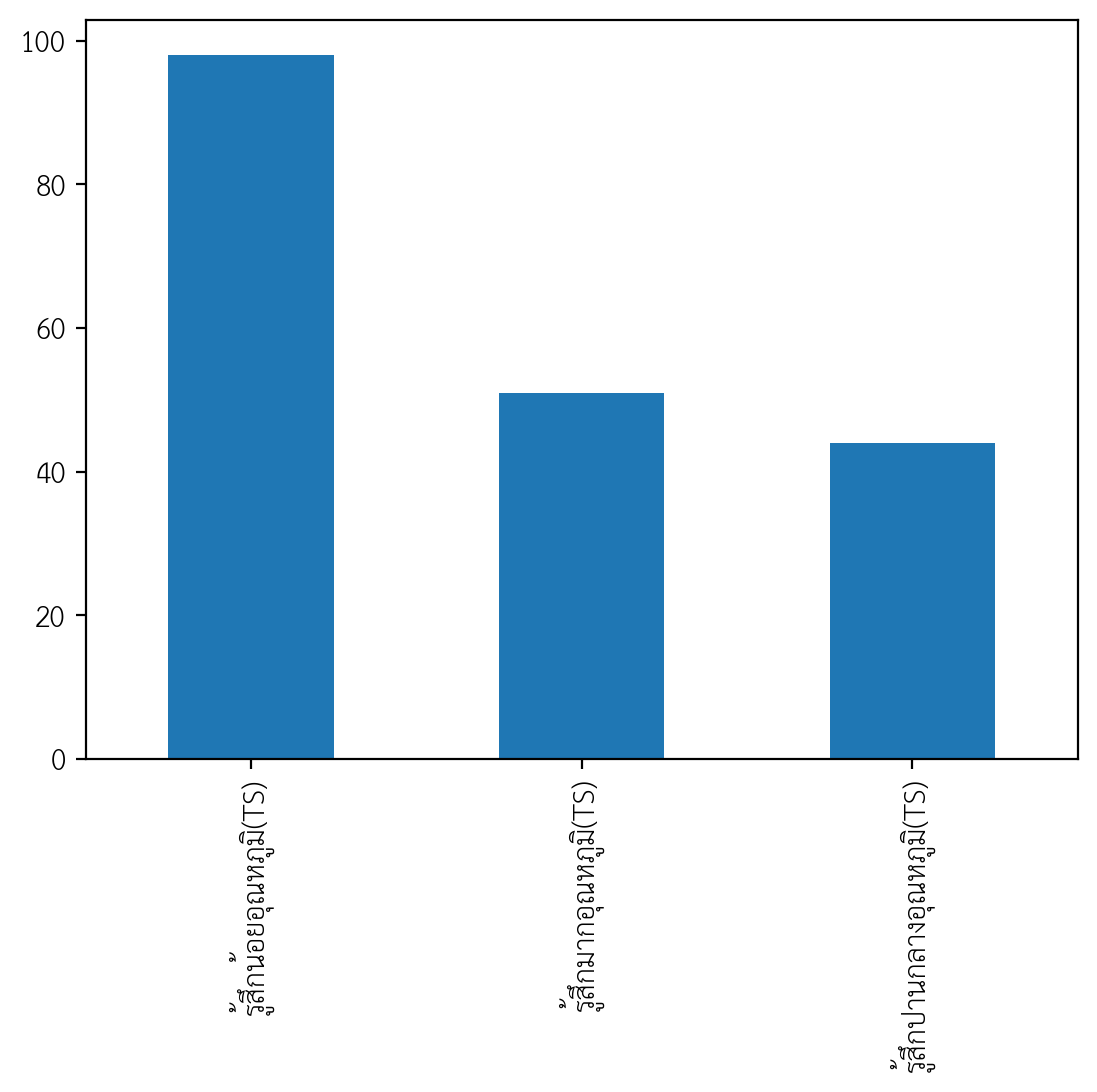

In [ ]:
data['อุณหภูมิ(TS)'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

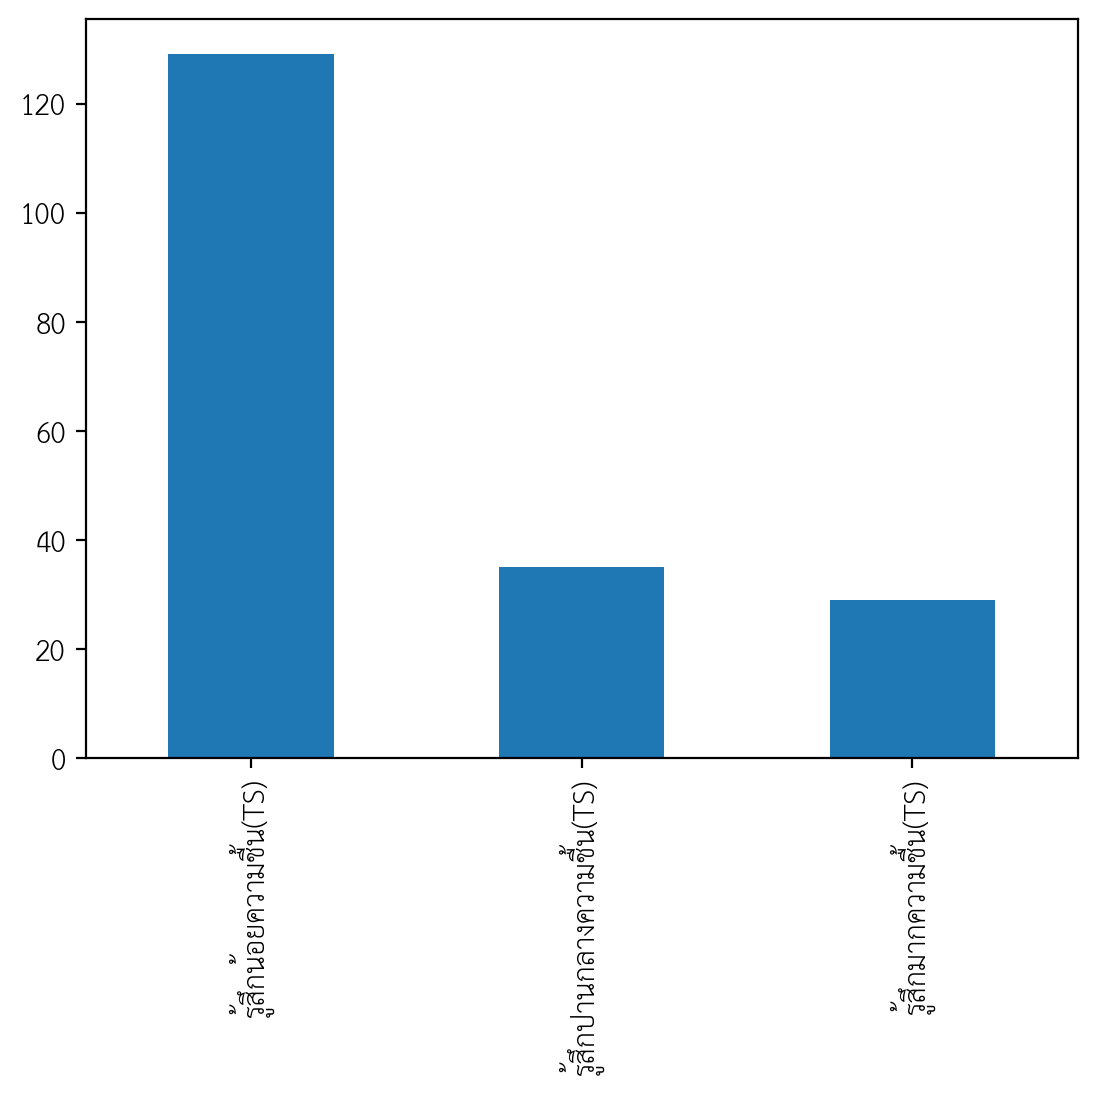

In [ ]:
data['ความชื้น(TS)'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

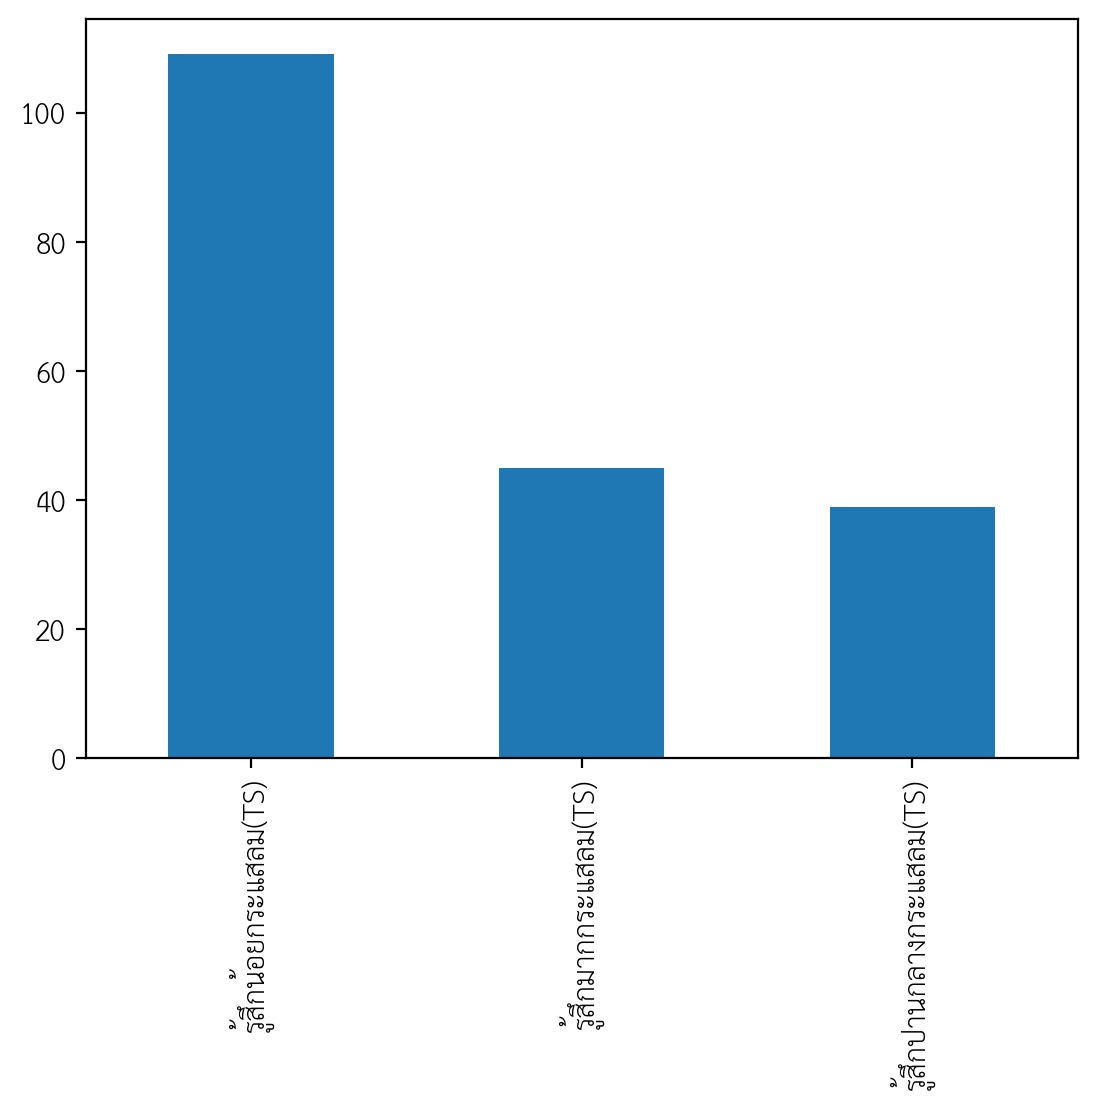

In [ ]:
data['กระแสลม(TS)'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

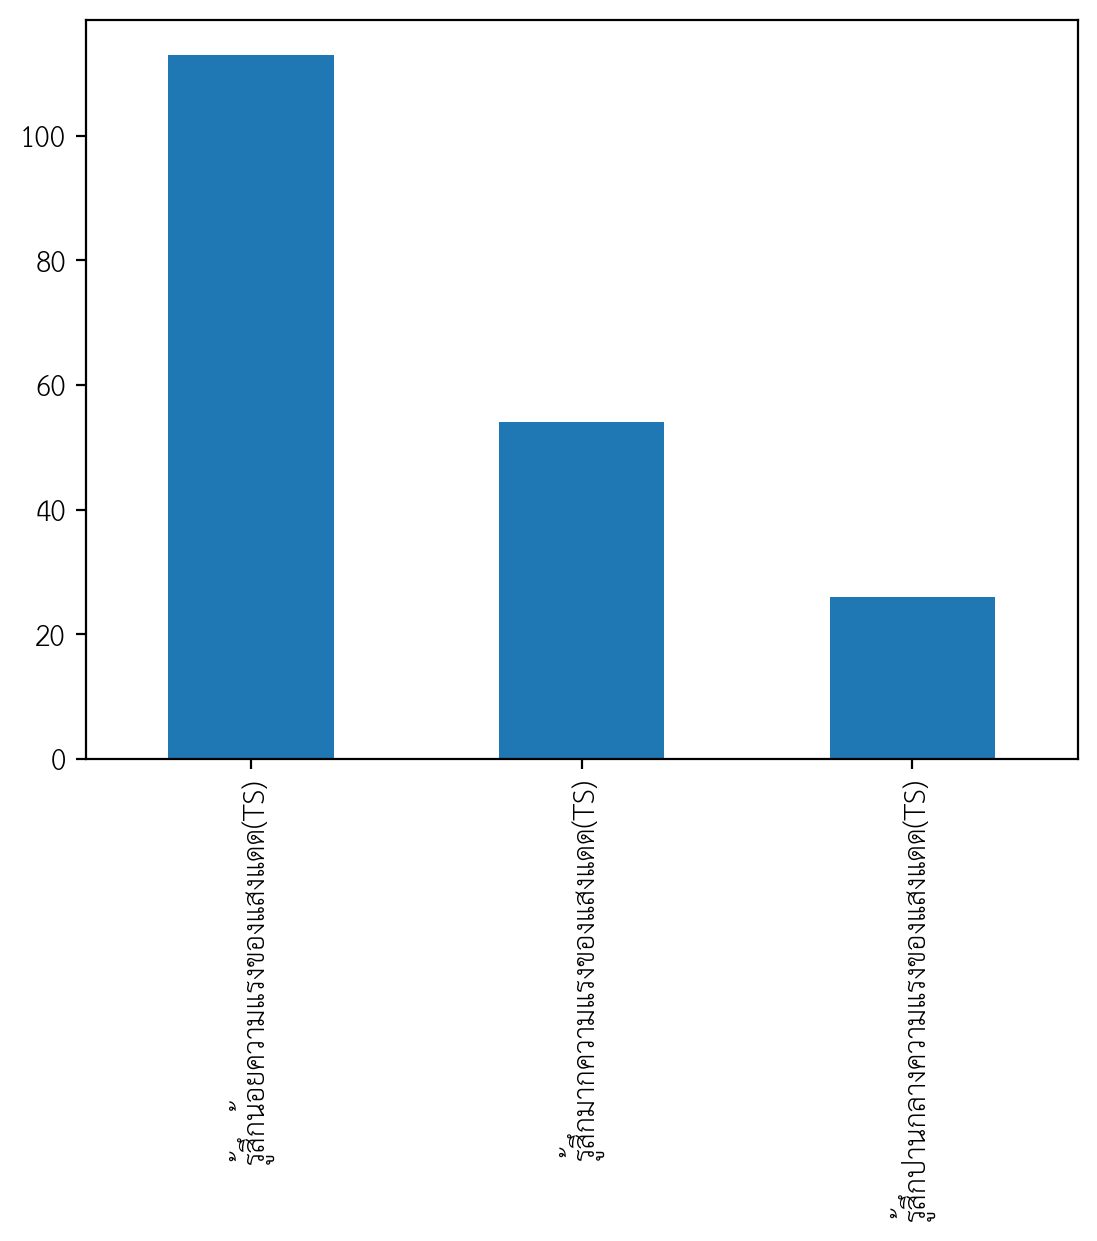

In [ ]:
data['ความแรงของแสงแดด(TS)'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

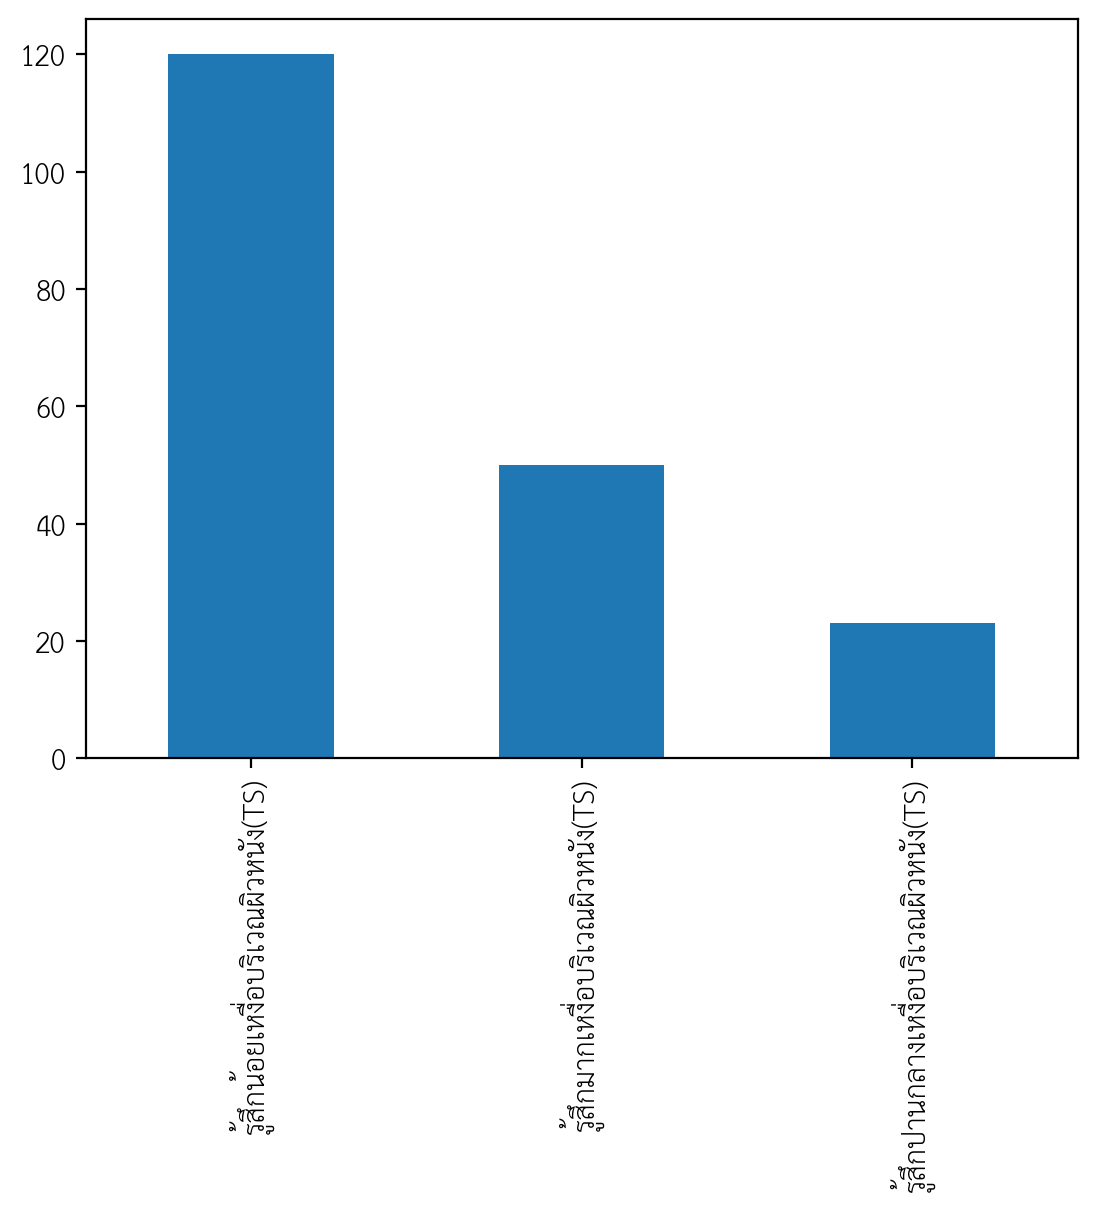

In [ ]:
data['เหงื่อบริเวณผิวหนัง(TS)'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

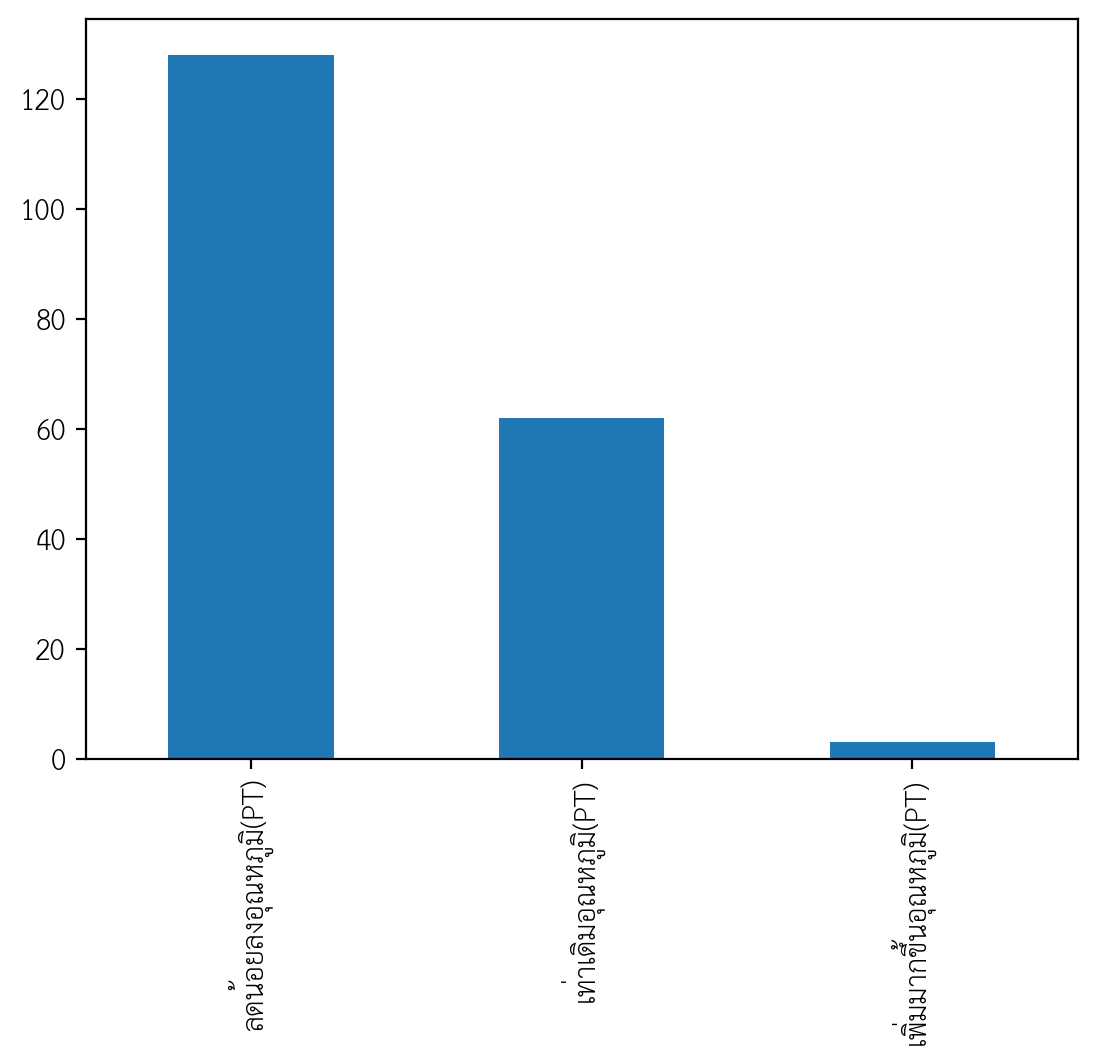

In [ ]:
data['อุณหภูมิ(PT)'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

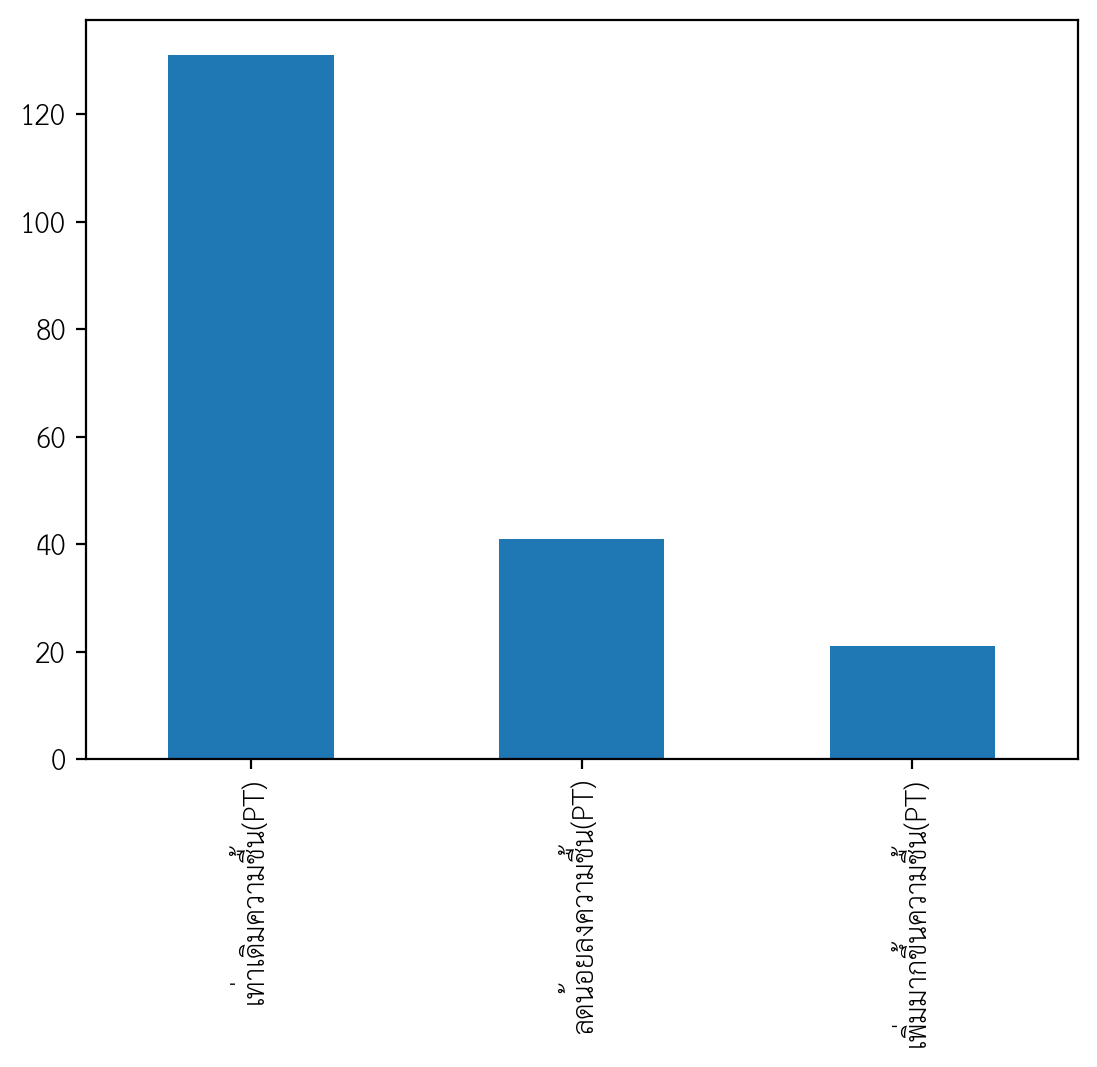

In [ ]:
data['ความชื้น(PT)'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

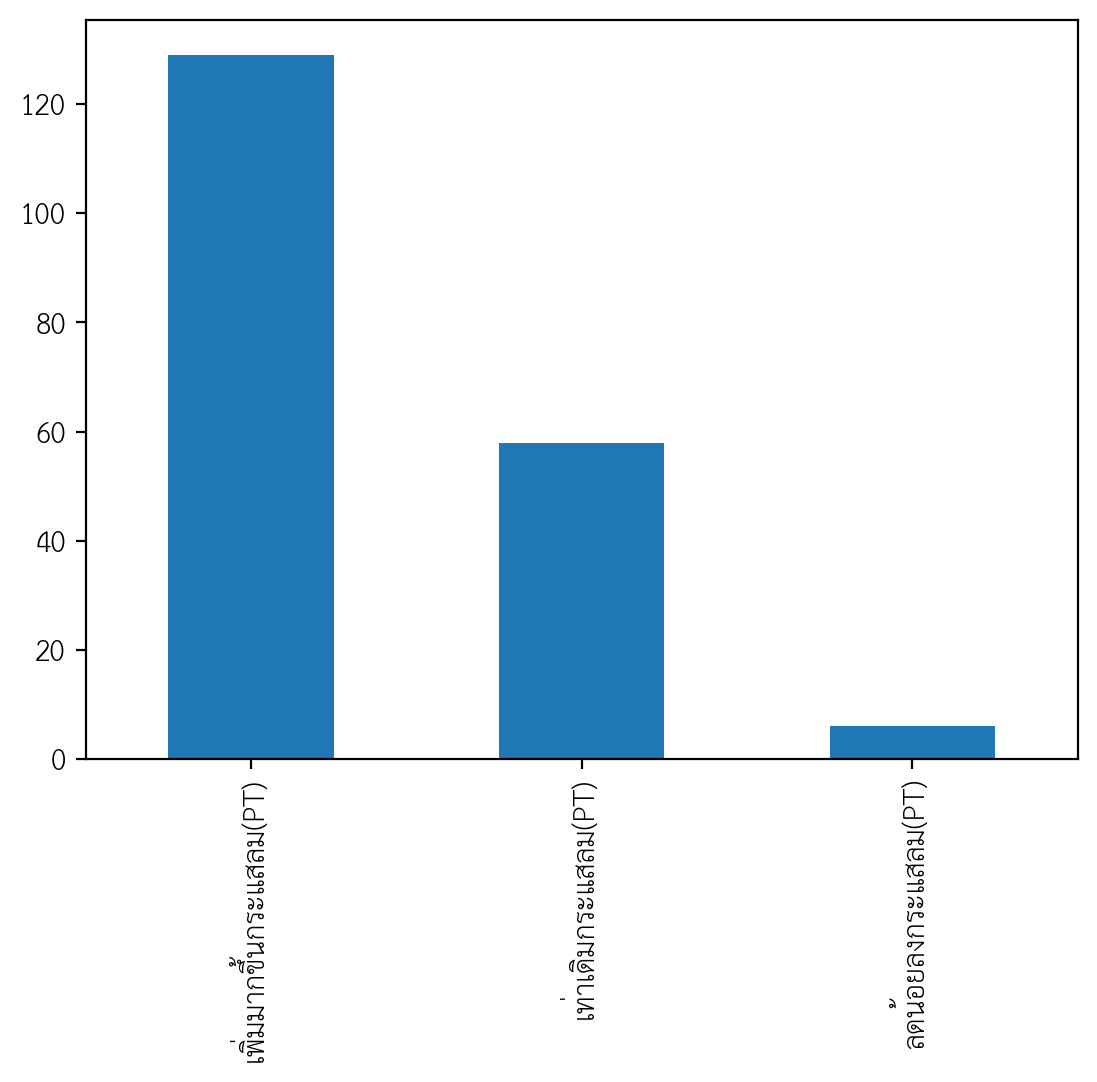

In [ ]:
data['กระแสลม(PT)'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

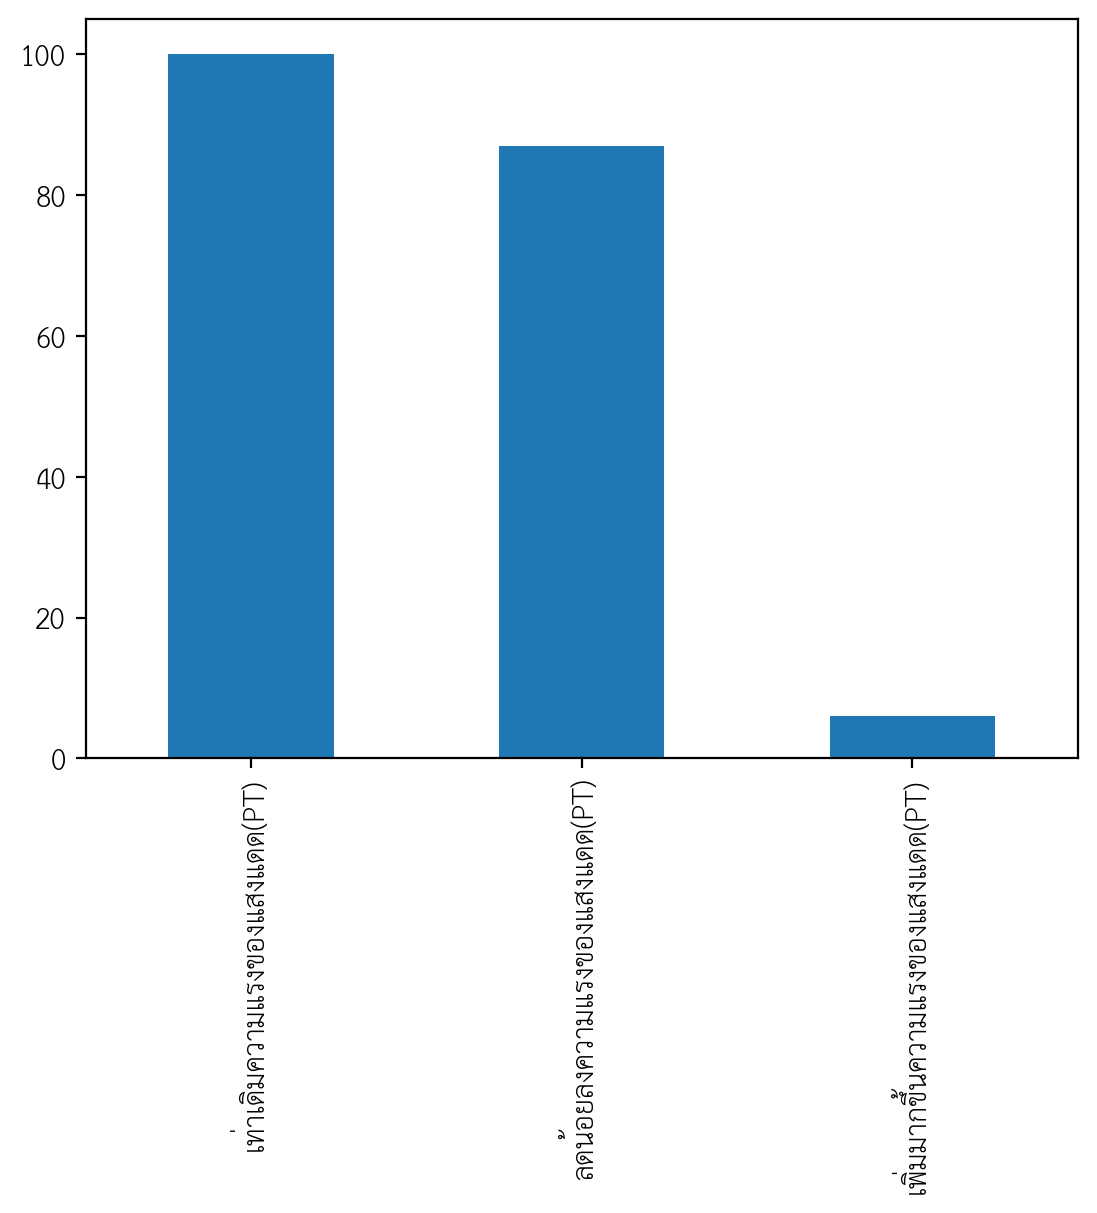

In [ ]:
data['ความแรงของแสงแดด(PT)'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

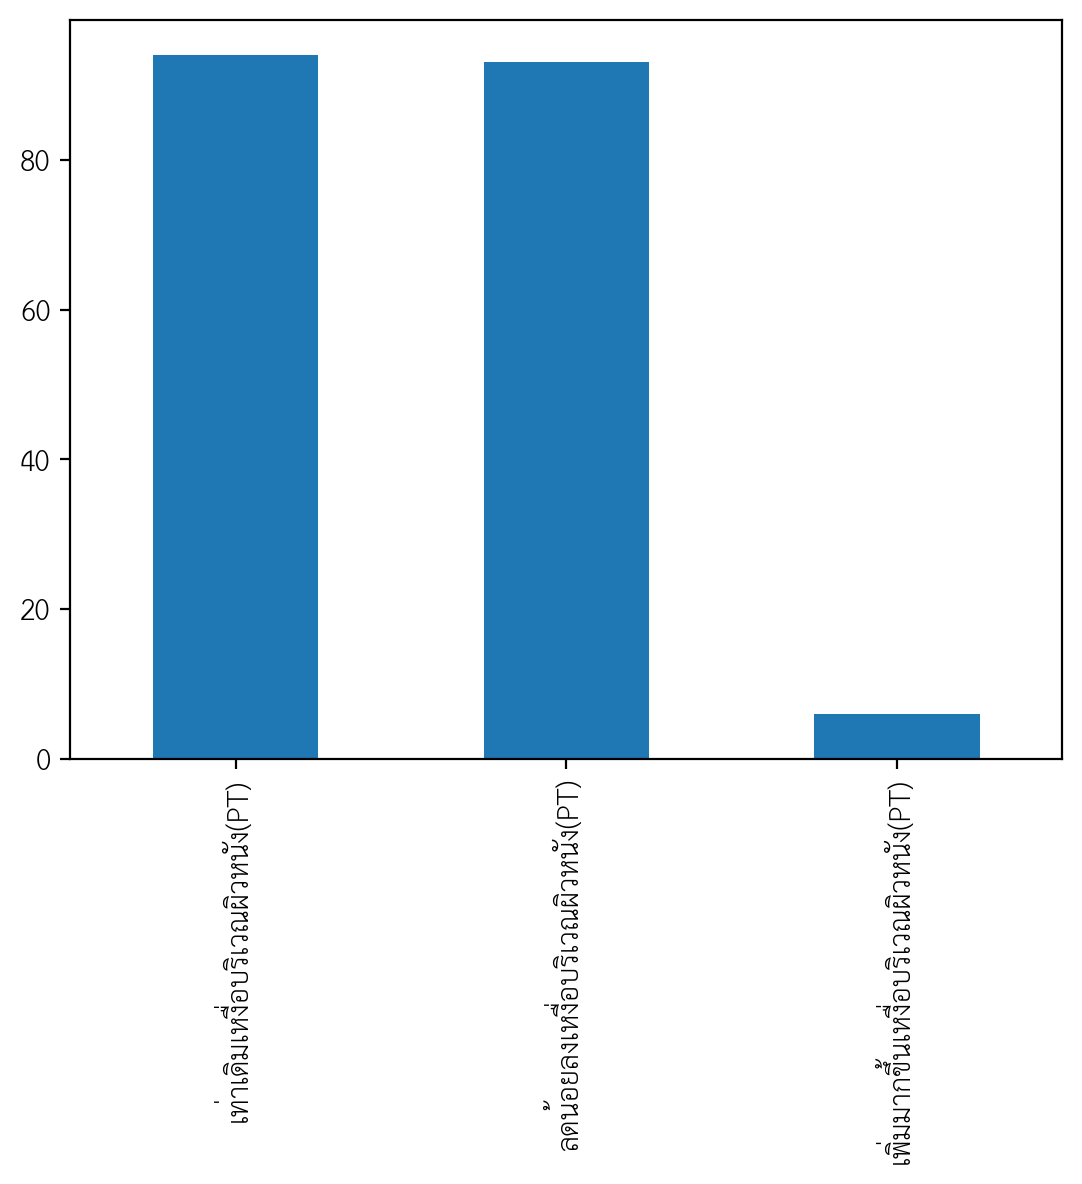

In [ ]:
data['เหงื่อบริเวณผิวหนัง(PT)'].value_counts().plot(kind='bar')

##แบ่งกลุ่ม TSV

In [ ]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['เพศ', 'Age', 'Weight', 'Height', 'BMI', 'พื้นที่ทำแบบสอบถาม', 'Temp',
       'Globe temp', 'RH', 'V', 'Thermal_acceptance', 'Thermal_sensation_Vote',
       'อุณหภูมิ', 'ความชื้น', 'กระแสลม', 'ความแรงของแสงแดด',
       'เหงื่อบริเวณผิวหนัง', 'ความร้อน', 'ความชื้น.1', 'กระแสลม.1', 'แสงแดด',
       'เหงื่อบริเวณผิวหนัง.1', 'TMRT', 'Clo', 'Met', 'seasons', 'age_cat',
       'v_cat', 'rh_cat', 'bmi_cat', 'temp_cat', 'อุณหภูมิ(TS)',
       'ความชื้น(TS)', 'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)',
       'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)',
       'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)', 'เหงื่อบริเวณผิวหนัง(PT)'],
      dtype='object')

In [ ]:
fo_mapping = {
    -3 :'หนาว(-3)',
    -2 :'เย็น(-2)',
    -1 :'เย็น(-1)',
    0 :'ปกติ(0)',
    1 :'ร้อน(1)',
    2 :'ร้อน(2)',
    3 :'ร้อนมาก(3)',
}

data['Thermal_Sensation_Vote'] = data['Thermal_sensation_Vote'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='หนาว(-3)'] = 'เย็น(-1)'
data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='เย็น(-2)'] = 'เย็น(-1)'

data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='ร้อน(2)'] = 'ร้อน(1)'
data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='ร้อนมาก(3)'] = 'ร้อน(1)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-44-3d716d1997df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='หนาว(-3)'] = 'เย็น(-1)'
<ipython-input-44-3d716d1997df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Thermal_Sensati

In [ ]:
data['Thermal_Sensation_Vote'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ร้อน(1)     91
ปกติ(0)     59
เย็น(-1)    43
Name: Thermal_Sensation_Vote, dtype: int64

##Thermal acceptance

In [ ]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat',  'พื้นที่ทำแบบสอบถาม','seasons','เพศ','Thermal_acceptance', 'อุณหภูมิ(TS)', 'ความชื้น(TS)',
           'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)', 'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)',
           'เหงื่อบริเวณผิวหนัง(PT)']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,พื้นที่ทำแบบสอบถาม,seasons,เพศ,Thermal_acceptance,อุณหภูมิ(TS),ความชื้น(TS),กระแสลม(TS),ความแรงของแสงแดด(TS),เหงื่อบริเวณผิวหนัง(TS),อุณหภูมิ(PT),ความชื้น(PT),กระแสลม(PT),ความแรงของแสงแดด(PT),เหงื่อบริเวณผิวหนัง(PT)
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกน้อยกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เพิ่มมากขึ้นกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,หญิง,Accept,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกน้อยความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),เท่าเดิมความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกปานกลางความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกมากความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)


In [ ]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accept,Unaccept,summer,winter,ความชื้นเหมาะสม,ชาย,ชื้นเกินไป,น้ำหนักต่ำกว่าเกณฑ์,น้ำหนักเกิน,ภายนอก / ใต้ร่มไม้,...,เท่าเดิมอุณหภูมิ(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT),เพิ่มมากขึ้นกระแสลม(PT),เพิ่มมากขึ้นความชื้น(PT),เพิ่มมากขึ้นความแรงของแสงแดด(PT),เพิ่มมากขึ้นอุณหภูมิ(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT),แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,True,False,False,True,True,True,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
1,True,False,False,True,True,True,False,False,True,False,...,True,True,True,False,False,False,False,False,False,False
2,True,False,False,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
3,True,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,True,False,False,True,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
Accept,0.890625
วัยหนุ่มสาว,0.864583
ความชื้นเหมาะสม,0.843750
อากาศค่อนข้างร้อน,0.713542
ลมสงบ,0.687500
เท่าเดิมความชื้น(PT),0.677083
เพิ่มมากขึ้นกระแสลม(PT),0.671875
รู้สึกน้อยความชื้น(TS),0.666667
ลดน้อยลงอุณหภูมิ(PT),0.661458
winter,0.661458


##mini sup

In [ ]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.109375,(Unaccept)
2,0.338542,(summer)
3,0.661458,(winter)
4,0.843750,(ความชื้นเหมาะสม)
...,...,...
142202,0.119792,"(วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), winter, ..."
142203,0.104167,"(วัยหนุ่มสาว, winter, ลมสงบ, เท่าเดิมความชื้น(..."
142204,0.104167,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."
142205,0.104167,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."


In [ ]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.338542,(summer)
2,0.661458,(winter)
3,0.843750,(ความชื้นเหมาะสม)
4,0.651042,(ชาย)
...,...,...
16500,0.234375,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."
16501,0.218750,"(วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), winter, ..."
16502,0.203125,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."
16503,0.203125,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."


In [ ]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.338542,(summer)
2,0.661458,(winter)
3,0.843750,(ความชื้นเหมาะสม)
4,0.651042,(ชาย)
...,...,...
3466,0.312500,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."
3467,0.312500,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."
3468,0.322917,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."
3469,0.312500,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."


In [ ]:
output4 = apriori(df, min_support=0.4, use_colnames=True)
output4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.661458,(winter)
2,0.843750,(ความชื้นเหมาะสม)
3,0.651042,(ชาย)
4,0.557292,(ภายนอก/ มีหลังคาคลุม)
...,...,...
648,0.406250,"(วัยหนุ่มสาว, winter, Accept, รู้สึกน้อยเหงื่อ..."
649,0.406250,"(วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), winter, ..."
650,0.411458,"(วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), winter, ..."
651,0.411458,"(วัยหนุ่มสาว, winter, เท่าเดิมความชื้น(PT), Ac..."


##min support = 0.5

In [ ]:
output5 = apriori(df, min_support=0.5, use_colnames=True)
output5.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
12,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
49,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
28,0.776042,"(วัยหนุ่มสาว, Accept)"
...,...,...
92,0.500000,"(รู้สึกน้อยความชื้น(TS), เท่าเดิมความชื้น(PT),..."
61,0.500000,"(เท่าเดิมความชื้น(PT), รู้สึกน้อยเหงื่อบริเวณผ..."
80,0.500000,"(ความชื้นเหมาะสม, Accept, ภายนอก/ มีหลังคาคลุม)"
138,0.500000,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, winter, Accept,..."


In [ ]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
8,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
23,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
18,0.776042,"(วัยหนุ่มสาว, Accept)"
13,0.750000,"(ความชื้นเหมาะสม, Accept)"
9,0.713542,(อากาศค่อนข้างร้อน)
29,0.703125,"(ความชื้นเหมาะสม, Accept, วัยหนุ่มสาว)"
7,0.687500,(ลมสงบ)
10,0.677083,(เท่าเดิมความชื้น(PT))


In [ ]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.843750,(ความชื้นเหมาะสม)
2,0.864583,(วัยหนุ่มสาว)
3,0.713542,(อากาศค่อนข้างร้อน)
4,0.750000,"(ความชื้นเหมาะสม, Accept)"
5,0.776042,"(วัยหนุ่มสาว, Accept)"
6,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
7,0.703125,"(ความชื้นเหมาะสม, Accept, วัยหนุ่มสาว)"


In [ ]:
output8 = apriori(df, min_support=0.8, use_colnames=oht.columns_)
output8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.843750,(ความชื้นเหมาะสม)
2,0.864583,(วัยหนุ่มสาว)


## mini conf

In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.2)
frequent_conf2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(summer),0.890625,0.338542,0.250000,0.280702,0.829150,-0.051514,0.919588,-0.653251
1,(summer),(Accept),0.338542,0.890625,0.250000,0.738462,0.829150,-0.051514,0.418199,-0.237523
2,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
3,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
4,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
...,...,...,...,...,...,...,...,...,...,...
1440795,(รู้สึกน้อยอุณหภูมิ(TS)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",0.510417,0.213542,0.203125,0.397959,1.863614,0.094130,1.306321,0.946536
1440796,(วัยหนุ่มสาว),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",0.864583,0.203125,0.203125,0.234940,1.156627,0.027507,1.041585,1.000000
1440797,(เท่าเดิมความชื้น(PT)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",0.677083,0.218750,0.203125,0.300000,1.371429,0.055013,1.116071,0.838710
1440798,(รู้สึกน้อยความชื้น(TS)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",0.666667,0.218750,0.203125,0.304688,1.392857,0.057292,1.123596,0.846154


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.3)
frequent_conf3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
1,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
2,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
3,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
4,(Accept),(ชาย),0.890625,0.651042,0.604167,0.678363,1.041965,0.024333,1.084943,0.368227
...,...,...,...,...,...,...,...,...,...,...
128269,(เท่าเดิมความแรงของแสงแดด(PT)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), Accept, คว...",0.520833,0.354167,0.312500,0.600000,1.694118,0.128038,1.614583,0.855072
128270,(รู้สึกน้อยอุณหภูมิ(TS)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), Accept, คว...",0.510417,0.338542,0.312500,0.612245,1.808477,0.139703,1.705866,0.913121
128271,(วัยหนุ่มสาว),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), Accept, คว...",0.864583,0.312500,0.312500,0.361446,1.156627,0.042318,1.076651,1.000000
128272,(เท่าเดิมความชื้น(PT)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), Accept, คว...",0.677083,0.343750,0.312500,0.461538,1.342657,0.079753,1.218750,0.790323


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf4 = association_rules(output4, metric = "confidence", min_threshold = 0.4)
frequent_conf4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
1,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
2,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
3,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
4,(Accept),(ชาย),0.890625,0.651042,0.604167,0.678363,1.041965,0.024333,1.084943,0.368227
...,...,...,...,...,...,...,...,...,...,...
8213,(Accept),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",0.890625,0.421875,0.421875,0.473684,1.122807,0.046143,1.098437,1.000000
8214,(รู้สึกน้อยความแรงของแสงแดด(TS)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), Accept, เท...",0.588542,0.427083,0.421875,0.716814,1.678394,0.170519,2.023112,0.982341
8215,(เท่าเดิมความแรงของแสงแดด(PT)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), Accept, รู...",0.520833,0.468750,0.421875,0.810000,1.728000,0.177734,2.796053,0.879227
8216,(วัยหนุ่มสาว),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), Accept, รู...",0.864583,0.421875,0.421875,0.487952,1.156627,0.057129,1.129044,1.000000


##min threshold = 0.5

In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf5 = association_rules(output5, metric = "confidence", min_threshold = 0.5)
frequent_conf5.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
37,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
118,"(Accept, ภายนอก/ มีหลังคาคลุม)",(winter),0.541667,0.661458,0.541667,1.000000,1.511811,0.183377,inf,0.738636
279,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
309,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
313,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
...,...,...,...,...,...,...,...,...,...,...
162,(Accept),"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",0.890625,0.515625,0.500000,0.561404,1.088783,0.040771,1.104375,0.745536
416,(Accept),"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, winter)",0.890625,0.515625,0.500000,0.561404,1.088783,0.040771,1.104375,0.745536
541,(Accept),"(ความชื้นเหมาะสม, วัยหนุ่มสาว, ภายนอก/ มีหลังค...",0.890625,0.515625,0.500000,0.561404,1.088783,0.040771,1.104375,0.745536
670,(Accept),"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, วัยหนุ...",0.890625,0.515625,0.500000,0.561404,1.088783,0.040771,1.104375,0.745536


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf6 = association_rules(output6, metric = "confidence", min_threshold = 0.6)
frequent_conf6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
1,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
2,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
3,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
4,(ชาย),(Accept),0.651042,0.890625,0.604167,0.928000,1.041965,0.024333,1.519097,0.115414
5,(Accept),(ชาย),0.890625,0.651042,0.604167,0.678363,1.041965,0.024333,1.084943,0.368227
6,(รู้สึกน้อยความชื้น(TS)),(Accept),0.666667,0.890625,0.614583,0.921875,1.035088,0.020833,1.400000,0.101695
7,(Accept),(รู้สึกน้อยความชื้น(TS)),0.890625,0.666667,0.614583,0.690058,1.035088,0.020833,1.075472,0.309927
8,(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)),(Accept),0.625000,0.890625,0.619792,0.991667,1.113450,0.063151,13.125000,0.271709
9,(Accept),(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)),0.890625,0.625000,0.619792,0.695906,1.113450,0.063151,1.233173,0.931573


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf7 = association_rules(output7, metric = "confidence", min_threshold = 0.7)
frequent_conf7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
1,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
2,(วัยหนุ่มสาว),(Accept),0.864583,0.890625,0.776042,0.897590,1.007821,0.006022,1.068015,0.057305
3,(Accept),(วัยหนุ่มสาว),0.890625,0.864583,0.776042,0.871345,1.007821,0.006022,1.052557,0.070949
4,(ความชื้นเหมาะสม),(วัยหนุ่มสาว),0.843750,0.864583,0.791667,0.938272,1.085230,0.062174,2.193750,0.502632
5,(วัยหนุ่มสาว),(ความชื้นเหมาะสม),0.864583,0.843750,0.791667,0.915663,1.085230,0.062174,1.852679,0.579960
6,"(ความชื้นเหมาะสม, Accept)",(วัยหนุ่มสาว),0.750000,0.864583,0.703125,0.937500,1.084337,0.054688,2.166667,0.311111
7,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)",(Accept),0.791667,0.890625,0.703125,0.888158,0.997230,-0.001953,0.977941,-0.013158
8,"(วัยหนุ่มสาว, Accept)",(ความชื้นเหมาะสม),0.776042,0.843750,0.703125,0.906040,1.073826,0.048340,1.662946,0.306977
9,(ความชื้นเหมาะสม),"(วัยหนุ่มสาว, Accept)",0.843750,0.776042,0.703125,0.833333,1.073826,0.048340,1.343750,0.440000


##Thermal sensation Vote

In [ ]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat', 'เพศ', 'seasons', 'พื้นที่ทำแบบสอบถาม', 'Thermal_Sensation_Vote', 'อุณหภูมิ(TS)',
           'ความชื้น(TS)', 'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)', 'กระแสลม(PT)',
           'ความแรงของแสงแดด(PT)', 'เหงื่อบริเวณผิวหนัง(PT)']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,เพศ,seasons,พื้นที่ทำแบบสอบถาม,Thermal_Sensation_Vote,อุณหภูมิ(TS),ความชื้น(TS),กระแสลม(TS),ความแรงของแสงแดด(TS),เหงื่อบริเวณผิวหนัง(TS),อุณหภูมิ(PT),ความชื้น(PT),กระแสลม(PT),ความแรงของแสงแดด(PT),เหงื่อบริเวณผิวหนัง(PT)
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,ปกติ(0),รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกน้อยกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,เย็น(-1),รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เพิ่มมากขึ้นกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,หญิง,winter,ภายนอก/ มีหลังคาคลุม,เย็น(-1),รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกน้อยความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),เท่าเดิมความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,เย็น(-1),รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกปานกลางความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกมากความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,เย็น(-1),รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)


In [ ]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,summer,winter,ความชื้นเหมาะสม,ชาย,ชื้นเกินไป,น้ำหนักต่ำกว่าเกณฑ์,น้ำหนักเกิน,ปกติ(0),ภายนอก / ใต้ร่มไม้,ภายนอก/ กลางแจ้ง,...,เท่าเดิมเหงื่อบริเวณผิวหนัง(PT),เพิ่มมากขึ้นกระแสลม(PT),เพิ่มมากขึ้นความชื้น(PT),เพิ่มมากขึ้นความแรงของแสงแดด(PT),เพิ่มมากขึ้นอุณหภูมิ(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT),เย็น(-1),แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,False,True,True,True,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,True,False,False,False,...,True,True,False,False,False,False,True,False,False,False
2,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
3,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
4,False,True,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [ ]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
วัยหนุ่มสาว,0.864583
ความชื้นเหมาะสม,0.843750
อากาศค่อนข้างร้อน,0.713542
ลมสงบ,0.687500
เท่าเดิมความชื้น(PT),0.677083
เพิ่มมากขึ้นกระแสลม(PT),0.671875
รู้สึกน้อยความชื้น(TS),0.666667
ลดน้อยลงอุณหภูมิ(PT),0.661458
winter,0.661458
ชาย,0.651042


##ตัวเลขที่แสดงสัดส่วน itemsets ที่มีค่า support มากที่สุด ได้แก่ ความชื้นพอเหมาะ (0.84), อากาศค่อนข้างร้อน (0.71), ลมสงบ (0.69), winter (0.69), วัยหนุ่สาว (0.69), เป็นต้น

##mini sup

In [ ]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
32,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
128,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
35,0.713542,(อากาศค่อนข้างร้อน)
30,0.687500,(ลมสงบ)
...,...,...
70880,0.104167,"(วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), winter, ..."
70881,0.104167,"(วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), winter, ..."
70890,0.104167,"(รู้สึกน้อยอุณหภูมิ(TS), winter, เท่าเดิมความช..."
70894,0.104167,"(วัยหนุ่มสาว, ลดน้อยลงอุณหภูมิ(PT), winter, รู..."


In [ ]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
26,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
90,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
29,0.713542,(อากาศค่อนข้างร้อน)
24,0.687500,(ลมสงบ)
...,...,...
7624,0.203125,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยอุณหภ..."
4786,0.203125,"(ความชื้นเหมาะสม, เท่าเดิมความชื้น(PT), ลมสงบ,..."
2703,0.203125,"(รู้สึกน้อยความแรงของแสงแดด(TS), รู้สึกน้อยกระ..."
7634,0.203125,"(ความชื้นเหมาะสม, winter, เท่าเดิมความชื้น(PT)..."


In [ ]:
output25 = apriori(df, min_support=0.25, use_colnames=oht.columns_)
output25.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
21,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
67,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
24,0.713542,(อากาศค่อนข้างร้อน)
19,0.687500,(ลมสงบ)
...,...,...
3590,0.250000,"(รู้สึกน้อยอุณหภูมิ(TS), วัยหนุ่มสาว, ลมสงบ, ร..."
1893,0.250000,"(เท่าเดิมความชื้น(PT), ลมสงบ, ลดน้อยลงอุณหภูมิ..."
1901,0.250000,"(เท่าเดิมเหงื่อบริเวณผิวหนัง(PT), ลมสงบ, เท่าเ..."
596,0.250000,"(เท่าเดิมความแรงของแสงแดด(PT), ลมสงบ, ภายนอก/ ..."


In [ ]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
16,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
53,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
19,0.713542,(อากาศค่อนข้างร้อน)
15,0.687500,(ลมสงบ)
...,...,...
769,0.302083,"(ลมสงบ, รู้สึกน้อยอุณหภูมิ(TS), รู้สึกน้อยความ..."
1551,0.302083,"(วัยหนุ่มสาว, เท่าเดิมความชื้น(PT), เท่าเดิมคว..."
780,0.302083,"(ลมสงบ, winter, รู้สึกน้อยความแรงของแสงแดด(TS)..."
781,0.302083,"(วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแดด(TS), ..."


##มีค่าตัวแปรตาม tsv สิ้นสุดที่ support = 0.3

In [ ]:
output4 = apriori(df, min_support=0.4, use_colnames=True)
output4.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
14,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
43,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
15,0.713542,(อากาศค่อนข้างร้อน)
13,0.687500,(ลมสงบ)
...,...,...
309,0.401042,"(รู้สึกน้อยความชื้น(TS), ความชื้นเหมาะสม, รู้ส..."
321,0.401042,"(รู้สึกน้อยความชื้น(TS), วัยหนุ่มสาว, รู้สึกน้..."
320,0.401042,"(รู้สึกน้อยความชื้น(TS), วัยหนุ่มสาว, รู้สึกน้..."
203,0.401042,"(รู้สึกน้อยความชื้น(TS), รู้สึกน้อยเหงื่อบริเว..."


##min support = 0.5

In [ ]:
output5 = apriori(df, min_support=0.5, use_colnames=True)
output5.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
11,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
32,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
12,0.713542,(อากาศค่อนข้างร้อน)
10,0.687500,(ลมสงบ)
...,...,...
71,0.505208,"(ความชื้นเหมาะสม, ลดน้อยลงอุณหภูมิ(PT), วัยหนุ..."
77,0.505208,"(รู้สึกน้อยความชื้น(TS), ความชื้นเหมาะสม, วัยห..."
56,0.505208,"(รู้สึกน้อยความชื้น(TS), ความชื้นเหมาะสม, winter)"
44,0.500000,"(เท่าเดิมความชื้น(PT), รู้สึกน้อยเหงื่อบริเวณผ..."


##Support(Itemset) = 0.5 มี itemsets คือ (วัยหนุ่มสาว, อากาศค่อนข้างร้อน), (ความชื้นเหมาะสม, ลมสงบ), (รู้สึกน้อย, วัยหนุ่มสาว), (เท่าเดิม, ลมสงบ), (เท่าเดิม, อากาศค่อนข้างร้อน) เป็นต้น

In [ ]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
7,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
13,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
8,0.713542,(อากาศค่อนข้างร้อน)
6,0.687500,(ลมสงบ)
9,0.677083,(เท่าเดิมความชื้น(PT))
10,0.671875,(เพิ่มมากขึ้นกระแสลม(PT))
3,0.666667,(รู้สึกน้อยความชื้น(TS))
12,0.661458,"(วัยหนุ่มสาว, winter)"
0,0.661458,(winter)


##Support(Itemset) = 0.6 มี itemsets คือ ลมสงบ, (วัยหนุ่มสาว, ลดน้อยลง), (วัยหนุ่มสาว, เท่าเดิม, ความชื้นเหมาะสม), (ลดน้อยลง, ความชื้นเหมาะสม) เป็นต้น

In [ ]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7.sort_values("support", ascending = False)

##Support(Itemset) = 0.7 มี itemsets คือ (วัยหนุ่มสาว, ความชื้นเหมาะสม), (วัยหนุ่มสาว, เท่าเดิม), เพิ่มากขึ้น, อากาศค่อนข้างร้อน, (เท่าเดิม, ความชื้นเหมาะสม)

In [ ]:
output8 = apriori(df, min_support=0.8, use_colnames=True)
output8.sort_values("support", ascending = False)

##Support(Itemset) = 0.8 มี itemsets คือ วัยหนุ่มสาว, ความชื้นพอเหมาะ, เท่าเดิม, ลดน้อยลง

## mini conf

In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf1 = association_rules(output1, metric = "confidence", min_threshold = 0.5)
frequent_conf1.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4586798,"(น้ำหนักต่ำกว่าเกณฑ์, รู้สึกน้อยอุณหภูมิ(TS), ...","(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",0.104167,0.187500,0.104167,1.0,5.333333,0.084635,inf,0.906977
4587740,"(น้ำหนักต่ำกว่าเกณฑ์, รู้สึกน้อยความแรงของแสงแ...","(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",0.109375,0.187500,0.109375,1.0,5.333333,0.088867,inf,0.912281
6130665,"(รู้สึกน้อยความแรงของแสงแดด(TS), น้ำหนักต่ำกว่...","(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",0.104167,0.187500,0.104167,1.0,5.333333,0.084635,inf,0.906977
6130775,"(น้ำหนักต่ำกว่าเกณฑ์, รู้สึกน้อยอุณหภูมิ(TS), ...","(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",0.104167,0.187500,0.104167,1.0,5.333333,0.084635,inf,0.906977
882493,"(รู้สึกมากความแรงของแสงแดด(TS), ภายใต้อาคาร, ร...","(รู้สึกมากอุณหภูมิ(TS), summer, ลดน้อยลงอุณหภู...",0.104167,0.192708,0.104167,1.0,5.189189,0.084093,inf,0.901163
...,...,...,...,...,...,...,...,...,...,...
5751873,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",(อากาศค่อนข้างร้อน),0.208333,0.713542,0.104167,0.5,0.700730,-0.044488,0.572917,-0.350427
6258301,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",(อากาศค่อนข้างร้อน),0.218750,0.713542,0.109375,0.5,0.700730,-0.046712,0.572917,-0.353448
6368484,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมเห...",(อากาศค่อนข้างร้อน),0.239583,0.713542,0.119792,0.5,0.700730,-0.051161,0.572917,-0.359649
2540,"(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",(ความชื้นเหมาะสม),0.229167,0.843750,0.114583,0.5,0.592593,-0.078776,0.312500,-0.471429


In [ ]:
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.2)
frequent_conf2.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(ภายใต้อาคาร),(summer),0.270833,0.338542,0.270833,1.00000,2.953846,0.179145,inf,0.907143
545,"(ภายใต้อาคาร, ลดน้อยลงความแรงของแสงแดด(PT))",(summer),0.203125,0.338542,0.203125,1.00000,2.953846,0.134359,inf,0.830065
551,"(ลดน้อยลงอุณหภูมิ(PT), ภายใต้อาคาร)",(summer),0.223958,0.338542,0.223958,1.00000,2.953846,0.148139,inf,0.852349
558,"(ภายใต้อาคาร, ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT))",(summer),0.213542,0.338542,0.213542,1.00000,2.953846,0.141249,inf,0.841060
564,"(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",(summer),0.229167,0.338542,0.229167,1.00000,2.953846,0.151584,inf,0.858108
...,...,...,...,...,...,...,...,...,...,...
32589,(วัยหนุ่มสาว),"(ลมสงบ, ลดน้อยลงความแรงของแสงแดด(PT), ลดน้อยลง...",0.864583,0.244792,0.203125,0.23494,0.959754,-0.008518,0.987123,-0.236446
5787,(วัยหนุ่มสาว),"(หญิง, ลมสงบ)",0.864583,0.250000,0.203125,0.23494,0.939759,-0.013021,0.980315,-0.321285
32670,(วัยหนุ่มสาว),"(เพิ่มมากขึ้นกระแสลม(PT), ลดน้อยลงความแรงของแส...",0.864583,0.270833,0.203125,0.23494,0.867470,-0.031033,0.953084,-0.530120
32628,(วัยหนุ่มสาว),"(เพิ่มมากขึ้นกระแสลม(PT), ลดน้อยลงความแรงของแส...",0.864583,0.276042,0.203125,0.23494,0.851103,-0.035536,0.946276,-0.563683


In [ ]:
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.5).sort_values(by=['support', 'confidence', 'lift'], ascending = False)
frequent_conf2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
80,(ความชื้นเหมาะสม),(วัยหนุ่มสาว),0.843750,0.864583,0.791667,0.938272,1.085230,0.062174,2.193750,0.502632
81,(วัยหนุ่มสาว),(ความชื้นเหมาะสม),0.864583,0.843750,0.791667,0.915663,1.085230,0.062174,1.852679,0.579960
39,(winter),(วัยหนุ่มสาว),0.661458,0.864583,0.661458,1.000000,1.156627,0.089572,inf,0.400000
38,(วัยหนุ่มสาว),(winter),0.864583,0.661458,0.661458,0.765060,1.156627,0.089572,1.440972,1.000000
537,"(ความชื้นเหมาะสม, winter)",(วัยหนุ่มสาว),0.619792,0.864583,0.619792,1.000000,1.156627,0.083930,inf,0.356164
...,...,...,...,...,...,...,...,...,...,...
70833,"(ลมสงบ, วัยหนุ่มสาว, รู้สึกน้อยเหงื่อบริเวณผิว...","(เพิ่มมากขึ้นกระแสลม(PT), อากาศค่อนข้างร้อน)",0.406250,0.515625,0.203125,0.500000,0.969697,-0.006348,0.968750,-0.050000
121547,"(ลมสงบ, วัยหนุ่มสาว, รู้สึกน้อยเหงื่อบริเวณผิว...","(เพิ่มมากขึ้นกระแสลม(PT), อากาศค่อนข้างร้อน)",0.406250,0.515625,0.203125,0.500000,0.969697,-0.006348,0.968750,-0.050000
13789,"(ลมสงบ, ความชื้นเหมาะสม, เพิ่มมากขึ้นกระแสลม(PT))",(เท่าเดิมความแรงของแสงแดด(PT)),0.406250,0.520833,0.203125,0.500000,0.960000,-0.008464,0.958333,-0.065574
55171,"(เท่าเดิมความชื้น(PT), รู้สึกน้อยความแรงของแสง...","(ความชื้นเหมาะสม, เพิ่มมากขึ้นกระแสลม(PT))",0.406250,0.552083,0.203125,0.500000,0.905660,-0.021159,0.895833,-0.149254


In [ ]:
frequent_conf2['consequents'][frequent_conf2['consequents']=='(วัยหนุ่มสาว)']
#data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='หนาว(-3)']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Series([], Name: consequents, dtype: object)

In [ ]:
frequent_conf25 = association_rules(output25, metric = "confidence", min_threshold = 0.25)
frequent_conf25.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ภายใต้อาคาร),(summer),0.270833,0.338542,0.270833,1.000000,2.953846,0.179145,inf,0.907143
107297,"(เท่าเดิมเหงื่อบริเวณผิวหนัง(PT), รู้สึกน้อยคว...","(รู้สึกน้อยความแรงของแสงแดด(TS), รู้สึกน้อยเหง...",0.270833,0.468750,0.270833,1.000000,2.133333,0.143880,inf,0.728571
117013,"(เท่าเดิมเหงื่อบริเวณผิวหนัง(PT), รู้สึกน้อยคว...","(รู้สึกน้อยความแรงของแสงแดด(TS), รู้สึกน้อยเหง...",0.255208,0.468750,0.255208,1.000000,2.133333,0.135579,inf,0.713287
119268,"(เท่าเดิมความชื้น(PT), รู้สึกน้อยอุณหภูมิ(TS),...","(รู้สึกน้อยความแรงของแสงแดด(TS), รู้สึกน้อยเหง...",0.265625,0.468750,0.265625,1.000000,2.133333,0.141113,inf,0.723404
119397,"(เท่าเดิมเหงื่อบริเวณผิวหนัง(PT), ภายนอก/ มีหล...","(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",0.255208,0.468750,0.255208,1.000000,2.133333,0.135579,inf,0.713287
...,...,...,...,...,...,...,...,...,...,...
44376,(วัยหนุ่มสาว),"(ลมสงบ, ลดน้อยลงอุณหภูมิ(PT), ชาย, อากาศค่อนข้...",0.864583,0.265625,0.250000,0.289157,1.088590,0.020345,1.033104,0.600962
13693,(วัยหนุ่มสาว),"(รู้สึกน้อยความชื้น(TS), ลดน้อยลงอุณหภูมิ(PT),...",0.864583,0.270833,0.250000,0.289157,1.067655,0.015842,1.025777,0.467949
40386,(วัยหนุ่มสาว),"(ลมสงบ, ความชื้นเหมาะสม, รู้สึกน้อยความชื้น(TS...",0.864583,0.270833,0.250000,0.289157,1.067655,0.015842,1.025777,0.467949
128,(วัยหนุ่มสาว),(ปกติ(0)),0.864583,0.302083,0.250000,0.289157,0.957208,-0.011176,0.981815,-0.248193


In [ ]:
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.3)
frequent_conf3.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35479,"(เท่าเดิมเหงื่อบริเวณผิวหนัง(PT), รู้สึกน้อยคว...","(วัยหนุ่มสาว, รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS...",0.302083,0.494792,0.302083,1.000000,2.021053,0.152615,inf,0.723881
14688,"(รู้สึกน้อยความชื้น(TS), ภายนอก/ มีหลังคาคลุม,...","(รู้สึกน้อยความแรงของแสงแดด(TS), winter)",0.302083,0.510417,0.302083,1.000000,1.959184,0.147895,inf,0.701493
15105,"(ภายนอก/ มีหลังคาคลุม, รู้สึกน้อยอุณหภูมิ(TS),...","(รู้สึกน้อยความแรงของแสงแดด(TS), winter)",0.312500,0.510417,0.312500,1.000000,1.959184,0.152995,inf,0.712121
16934,"(รู้สึกน้อยอุณหภูมิ(TS), รู้สึกน้อยเหงื่อบริเว...","(รู้สึกน้อยความแรงของแสงแดด(TS), winter)",0.364583,0.510417,0.364583,1.000000,1.959184,0.178494,inf,0.770492
17174,"(เท่าเดิมเหงื่อบริเวณผิวหนัง(PT), รู้สึกน้อยอุ...","(รู้สึกน้อยความแรงของแสงแดด(TS), winter)",0.307292,0.510417,0.307292,1.000000,1.959184,0.150445,inf,0.706767
...,...,...,...,...,...,...,...,...,...,...
9932,(วัยหนุ่มสาว),"(ลมสงบ, เท่าเดิมความชื้น(PT), รู้สึกน้อยความแร...",0.864583,0.317708,0.302083,0.349398,1.099743,0.027398,1.048708,0.669761
280,(วัยหนุ่มสาว),(เท่าเดิมอุณหภูมิ(PT)),0.864583,0.322917,0.302083,0.349398,1.082005,0.022895,1.040702,0.559682
2785,(วัยหนุ่มสาว),"(อากาศค่อนข้างร้อน, เท่าเดิมความแรงของแสงแดด(PT))",0.864583,0.322917,0.302083,0.349398,1.082005,0.022895,1.040702,0.559682
2719,(วัยหนุ่มสาว),"(ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT), อากาศค่อนข้า...",0.864583,0.380208,0.302083,0.349398,0.918964,-0.026638,0.952643,-0.394378


In [ ]:
frequent_conf4 = association_rules(output4, metric = "confidence", min_threshold = 0.4)
frequent_conf4.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
188,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
254,"(ชาย, ภายนอก/ มีหลังคาคลุม)",(winter),0.437500,0.661458,0.437500,1.000000,1.511811,0.148112,inf,0.601852
284,"(รู้สึกน้อยความชื้น(TS), ภายนอก/ มีหลังคาคลุม)",(winter),0.437500,0.661458,0.437500,1.000000,1.511811,0.148112,inf,0.601852
290,"(รู้สึกน้อยความแรงของแสงแดด(TS), ภายนอก/ มีหลั...",(winter),0.421875,0.661458,0.421875,1.000000,1.511811,0.142822,inf,0.585586
...,...,...,...,...,...,...,...,...,...,...
2186,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, ชาย, w...",0.864583,0.401042,0.401042,0.463855,1.156627,0.054308,1.117158,1.000000
2306,(วัยหนุ่มสาว),"(รู้สึกน้อยความชื้น(TS), ความชื้นเหมาะสม, รู้ส...",0.864583,0.401042,0.401042,0.463855,1.156627,0.054308,1.117158,1.000000
2605,(วัยหนุ่มสาว),"(รู้สึกน้อยความชื้น(TS), รู้สึกน้อยเหงื่อบริเว...",0.864583,0.401042,0.401042,0.463855,1.156627,0.054308,1.117158,1.000000
2695,(วัยหนุ่มสาว),"(รู้สึกน้อยความชื้น(TS), เท่าเดิมความชื้น(PT),...",0.864583,0.401042,0.401042,0.463855,1.156627,0.054308,1.117158,1.000000


##min threshold = 0.5

In [ ]:
frequent_conf5 = association_rules(output5, metric = "confidence", min_threshold = 0.5)
frequent_conf5.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
78,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
108,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
111,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
204,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, ภายนอก/ มีหลังค...",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
...,...,...,...,...,...,...,...,...,...,...
203,(วัยหนุ่มสาว),"(ความชื้นเหมาะสม, เพิ่มมากขึ้นกระแสลม(PT))",0.864583,0.552083,0.510417,0.590361,1.069334,0.033095,1.093444,0.478807
230,(วัยหนุ่มสาว),"(รู้สึกน้อยความชื้น(TS), ความชื้นเหมาะสม, winter)",0.864583,0.505208,0.505208,0.584337,1.156627,0.068414,1.190368,1.000000
166,(วัยหนุ่มสาว),"(ความชื้นเหมาะสม, รู้สึกน้อยความแรงของแสงแดด(TS))",0.864583,0.520833,0.505208,0.584337,1.121928,0.054905,1.152778,0.802538
179,(วัยหนุ่มสาว),"(ความชื้นเหมาะสม, ลดน้อยลงอุณหภูมิ(PT))",0.864583,0.536458,0.505208,0.584337,1.089250,0.041395,1.115187,0.605075


In [ ]:
frequent_conf6 = association_rules(output5, metric = "confidence", min_threshold = 0.6)
frequent_conf6.sort_values(['confidence', 'lift'], ascending = False)

In [ ]:
frequent_conf7 = association_rules(output5, metric = "confidence", min_threshold = 0.7)
frequent_conf7.sort_values(['confidence', 'lift'], ascending = False)

In [ ]:
frequent_conf8 = association_rules(output5, metric = "confidence", min_threshold = 0.8)
frequent_conf8.sort_values(['confidence', 'lift'], ascending = False)

In [ ]:
frequent_conf9 = association_rules(output5, metric = "confidence", min_threshold = 0.9)
frequent_conf9.sort_values(['confidence', 'lift'], ascending = False)

In [ ]:
frequent_conf10 = association_rules(output5, metric = "confidence", min_threshold = 1)
frequent_conf10.sort_values(['confidence', 'lift'], ascending = False)

##save ไฟล์

##TSV

In [ ]:
with pd.ExcelWriter('output.xlsx') as writer:
  output5_1.to_excel(writer, sheet_name='sheet1')
  frequent_conf5_1.to_excel(writer, sheet_name='sheet2')
  output4_1.to_excel(writer, sheet_name='sheet3')
  frequent_conf4_1.to_excel(writer, sheet_name='sheet4')
  frequent_conf4_2.to_excel(writer, sheet_name='sheet5')

In [ ]:
with pd.ExcelWriter("path to file\filename.xlsx") as excel_writer:
  frequent_conf2.to_excel(excel_writer, sheet_name='sheet_7', index=False)
  frequent_conf3.to_excel(excel_writer, sheet_name='sheet_8', index=False)
  frequent_conf4_1.to_excel(excel_writer, sheet_name='sheet_9', index=False)
  frequent_conf5.to_excel(excel_writer, sheet_name='sheet_10', index=False)

In [ ]:
with pd.ExcelWriter("TSV 3 values.xlsx") as excel_writer:
  frequent_conf2.to_excel(excel_writer, sheet_name='minsup 0.2', index=False)
  frequent_conf25.to_excel(excel_writer, sheet_name='minsup 0.25', index=False)
  frequent_conf3.to_excel(excel_writer, sheet_name='minsup 0.3', index=False)
  frequent_conf4.to_excel(excel_writer, sheet_name='minsup 0.4', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
with pd.ExcelWriter("TSV 3 values1.xlsx") as excel_writer:
  frequent_conf2.to_excel(excel_writer, sheet_name='minsup 0.2', index=False)
  frequent_conf25.to_excel(excel_writer, sheet_name='minsup 0.25', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
with pd.ExcelWriter("TSV 3 values2.xlsx") as excel_writer:
  frequent_conf3.to_excel(excel_writer, sheet_name='minsup 0.3', index=False)
  frequent_conf4.to_excel(excel_writer, sheet_name='minsup 0.4', index=False)
  frequent_conf5.to_excel(excel_writer, sheet_name='minsup 0.5', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##TA

In [ ]:
with pd.ExcelWriter("TA.xlsx") as excel_writer:
  frequent_conf5.to_excel(excel_writer, sheet_name='minsup 0.5', index=False)
  frequent_conf6.to_excel(excel_writer, sheet_name='minsup 0.6', index=False)
  frequent_conf7.to_excel(excel_writer, sheet_name='minsup 0.7', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
